# Human Activity Recognition (HAR) Assignment

This notebook implements and analyzes Human Activity Recognition using the UCI-HAR dataset. It includes:
- Exploratory Data Analysis (EDA)
- Decision Tree modeling using different feature types
- Prompt Engineering using LLMs
- Real-world data collection and evaluation


## Task 1: Exploratory Data Analysis (EDA) - Waveform Plots

### Plot the waveform for one sample data from each activity class. 
Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
FIG_WIDTH = 5
FIG_HEIGHT = 4

In [2]:

# Library imports
from sklearn.model_selection import train_test_split
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 5
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


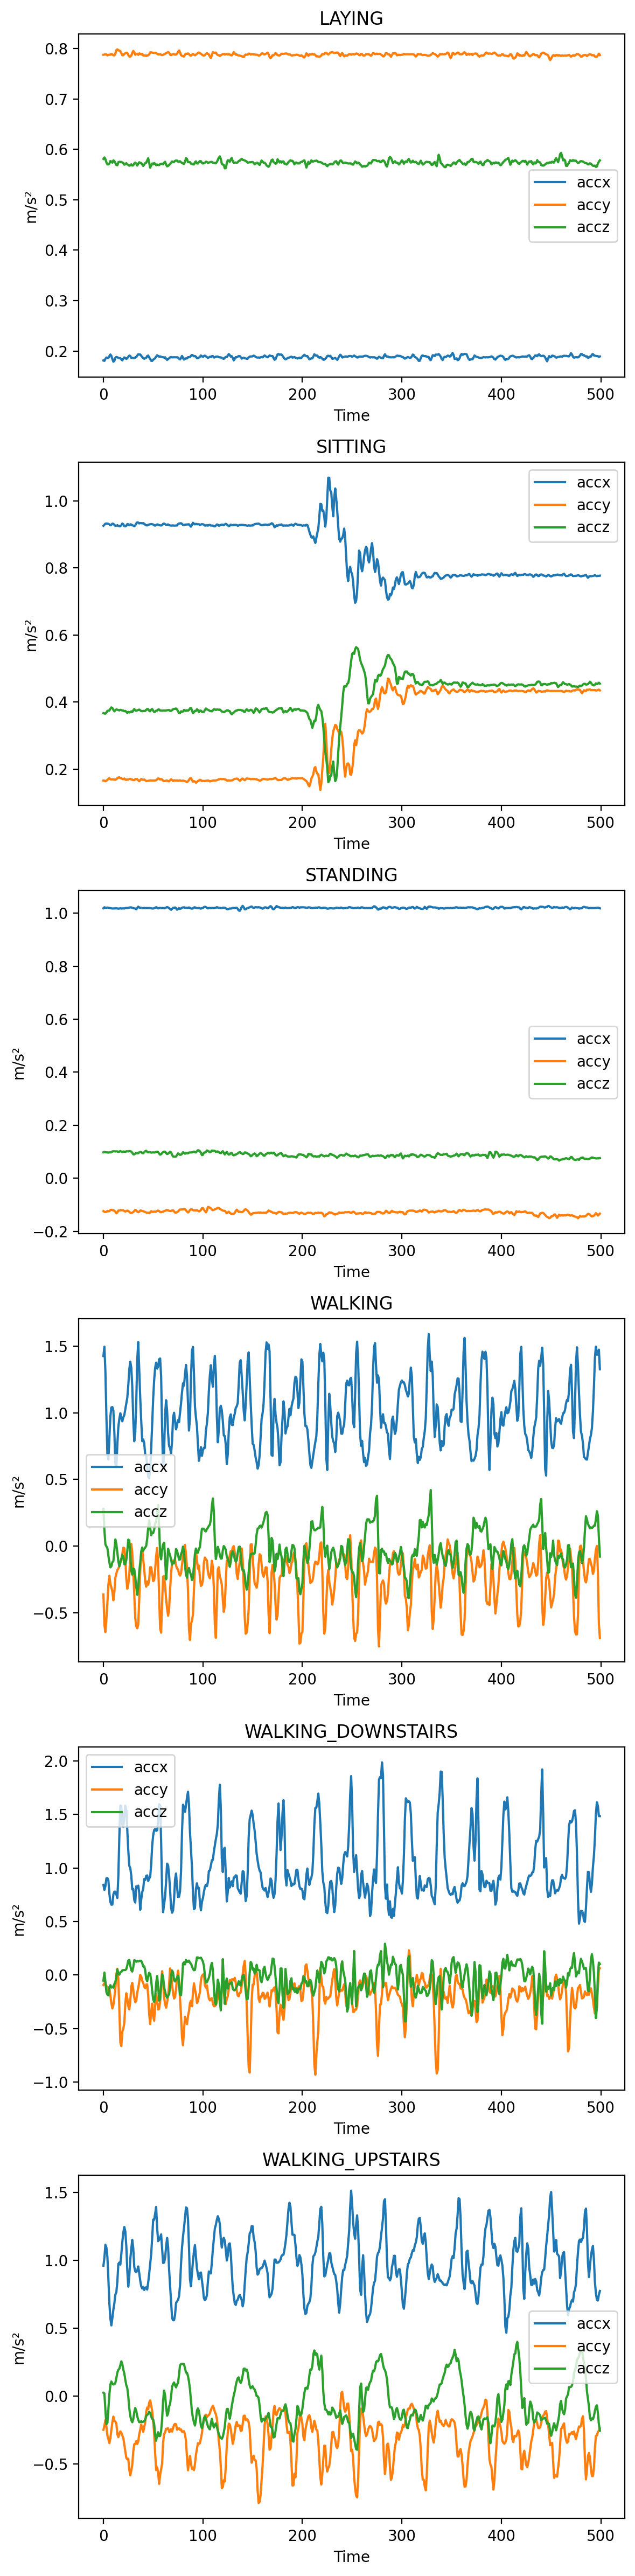

In [11]:
base_path = os.path.join("Combined", "Train")
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
data = [pd.read_csv(os.path.join(base_path, a, "Subject_1.csv")) for a in activities]

# Define plotting function
def waveform(df, title, ax):
    ax.plot(df['accx'][:500], label="accx")
    ax.plot(df['accy'][:500], label="accy")
    ax.plot(df['accz'][:500], label="accz")
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("m/s²")
    ax.legend()

# Plot 6 subplots (1 for each activity)
fig, axs = plt.subplots(6, 1, figsize=(6, 24))
for i, df in enumerate(data):
    waveform(df, activities[i], axs[i])

plt.tight_layout()
plt.show()

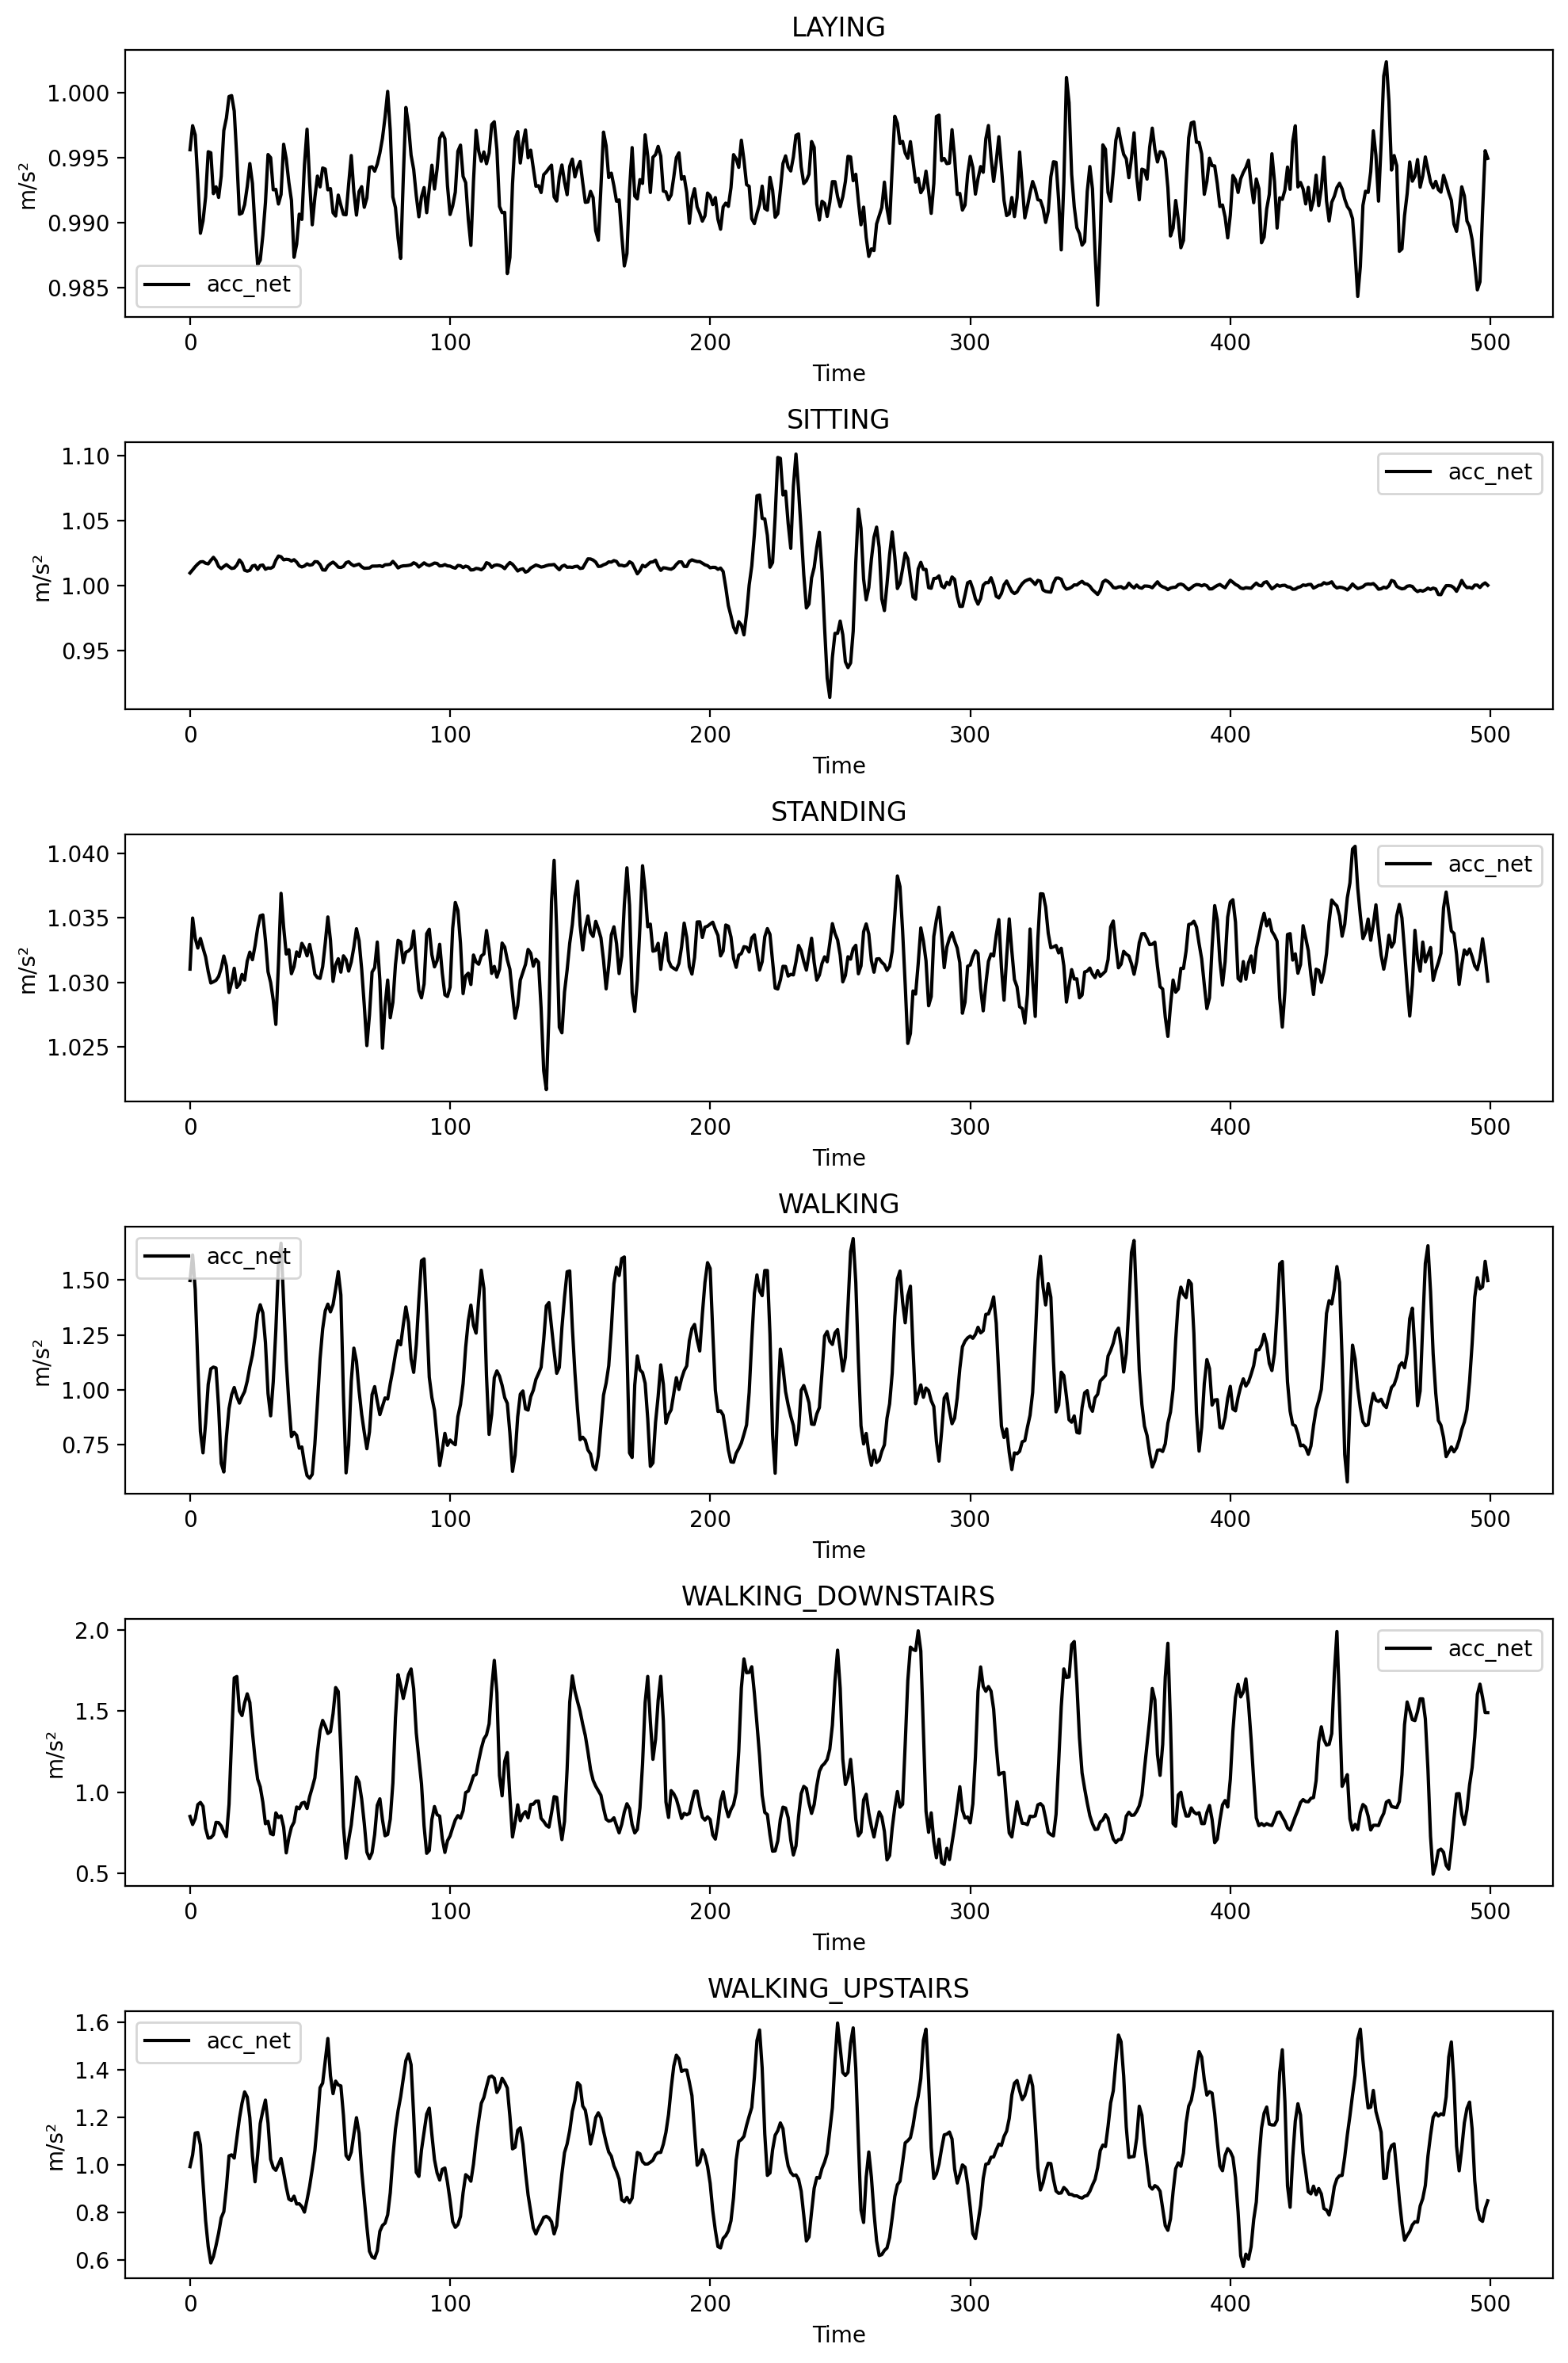

In [15]:
# Define acc_net waveform function
def plot_acc_net(df, title, ax):
    acc_net = np.sqrt(df['accx'][:500]**2 + df['accy'][:500]**2 + df['accz'][:500]**2)
    ax.plot(acc_net, color='black', label='acc_net')
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("m/s²")
    ax.legend()

# Plot all acc_net waveforms
fig, axs = plt.subplots(6, 1, figsize=(10, 15))
for i, df in enumerate(data):
    plot_acc_net(df, activities[i], axs[i])

plt.tight_layout()
plt.show()

Yes, based on the waveforms, it is likely that a machine learning model will be able to classify the activities. The distinct signal patterns between static and dynamic activities, especially the periodic nature of dynamic movements, provide enough discriminative features for classification algorithms to learn from.
- The static vs dynamic difference is particularly strong.

- Even among dynamic activities, patterns (e.g., stride frequency) differ enough to be useful for classification.

### Visualize the data using PCA.
Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

1. PCA on Flattened Raw Acceleration Data

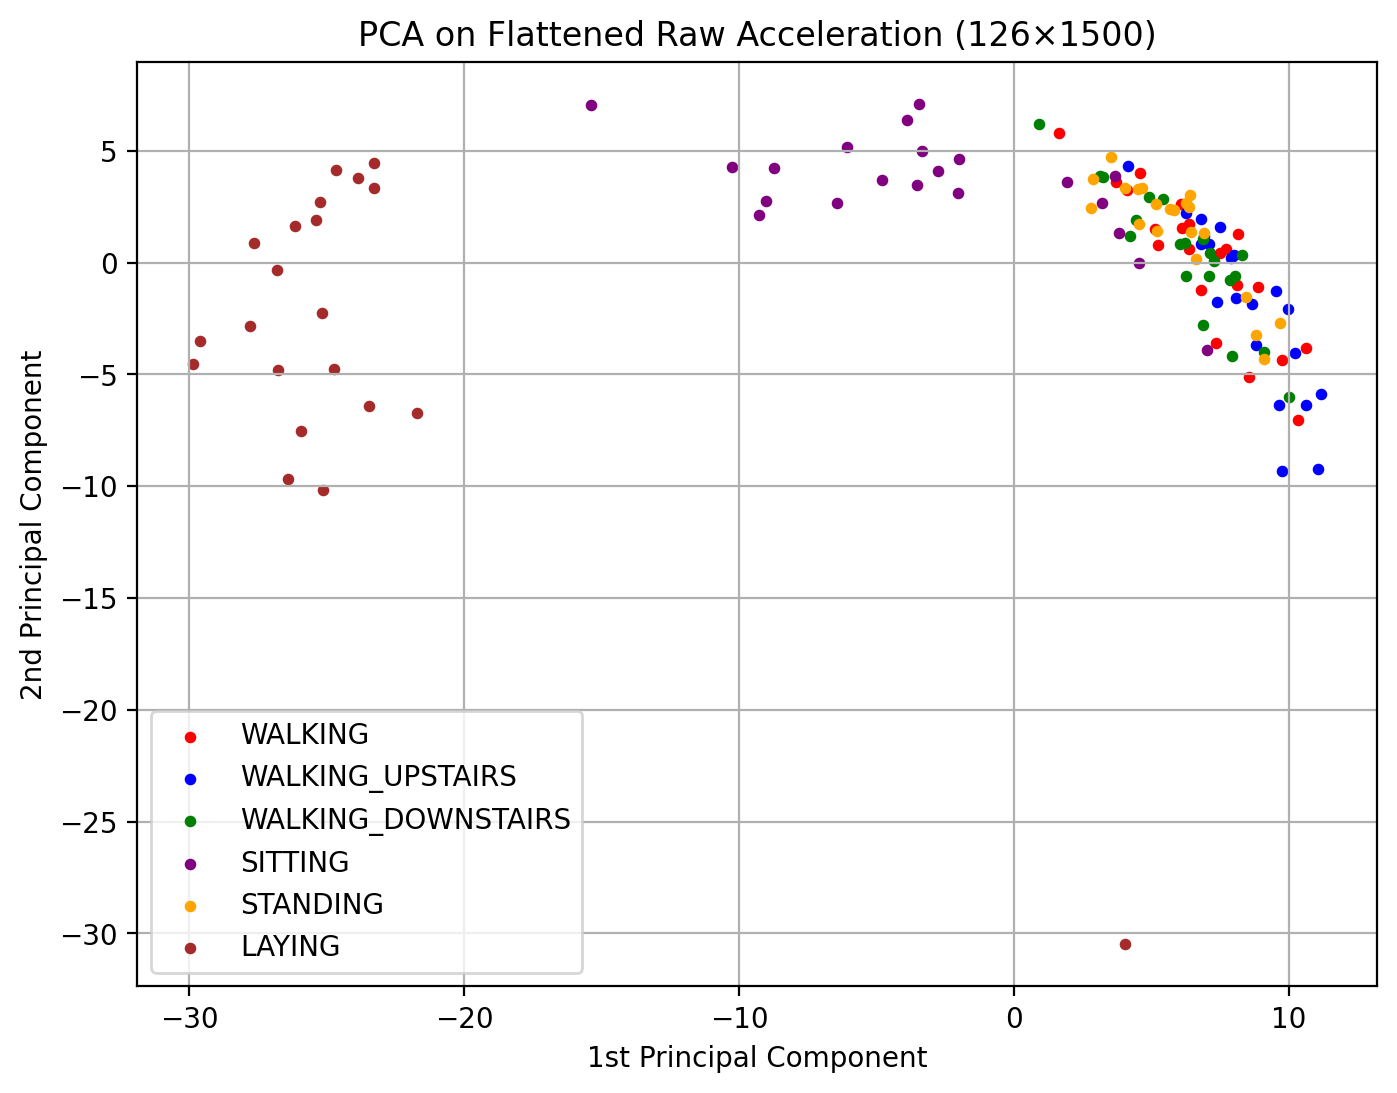

In [16]:
# Flatten from (126, 500, 3) → (126, 1500)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

pca = PCA(n_components=2)
X_pca_raw = pca.fit_transform(X_train_flattened)

activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

plt.figure(figsize=(8, 6))
for i in range(6):
    indices = np.where(y_train == i + 1)[0]
    plt.scatter(X_pca_raw[indices, 0], X_pca_raw[indices, 1], label=activity_labels[i], s=10, color=colors[i])

plt.title("PCA on Flattened Raw Acceleration (126×1500)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend()
plt.grid(True)
plt.show()

2. PCA on TSFEL Features

In [20]:
import warnings
warnings.filterwarnings('ignore')

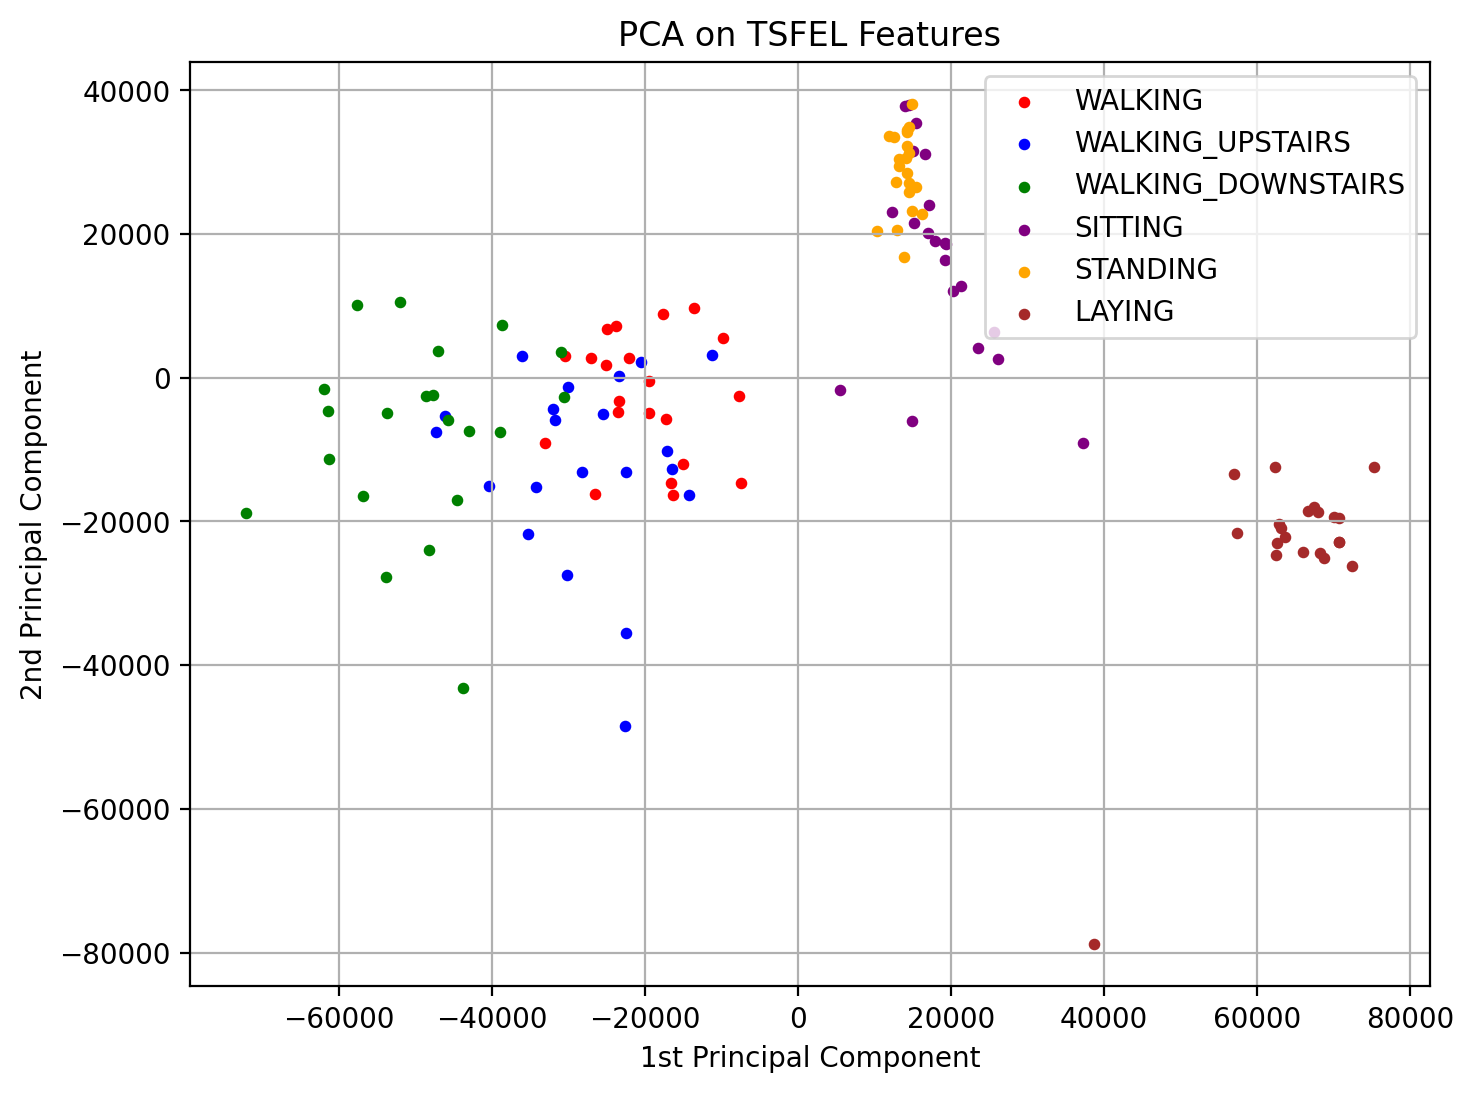

In [21]:
import tsfel
import os
from sklearn.preprocessing import LabelEncoder

# Convert each sample (500, 3) to a dataframe and extract features
cfg = tsfel.get_features_by_domain()

X_tsfel_list = []
y_labels = []

for i in range(X_train.shape[0]):
    df_sample = pd.DataFrame({
        'accx': X_train[i, :, 0],
        'accy': X_train[i, :, 1],
        'accz': X_train[i, :, 2],
    })
    
    # Concatenate features from each axis
    feats = []
    for col in df_sample.columns:
        feats.append(tsfel.time_series_features_extractor(cfg, df_sample[[col]], verbose=0))
    
    combined_feats = pd.concat(feats, axis=1)
    X_tsfel_list.append(combined_feats.values.flatten())
    y_labels.append(y_train[i])

X_tsfel = np.array(X_tsfel_list)

# PCA
pca = PCA(n_components=2)
X_pca_tsfel = pca.fit_transform(X_tsfel)

plt.figure(figsize=(8, 6))
for i in range(6):
    indices = np.where(np.array(y_labels) == i + 1)[0]
    plt.scatter(X_pca_tsfel[indices, 0], X_pca_tsfel[indices, 1], label=activity_labels[i], s=10, color=colors[i])

plt.title("PCA on TSFEL Features")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend()
plt.grid(True)
plt.show()


3. PCA on Dataset-Provided Features

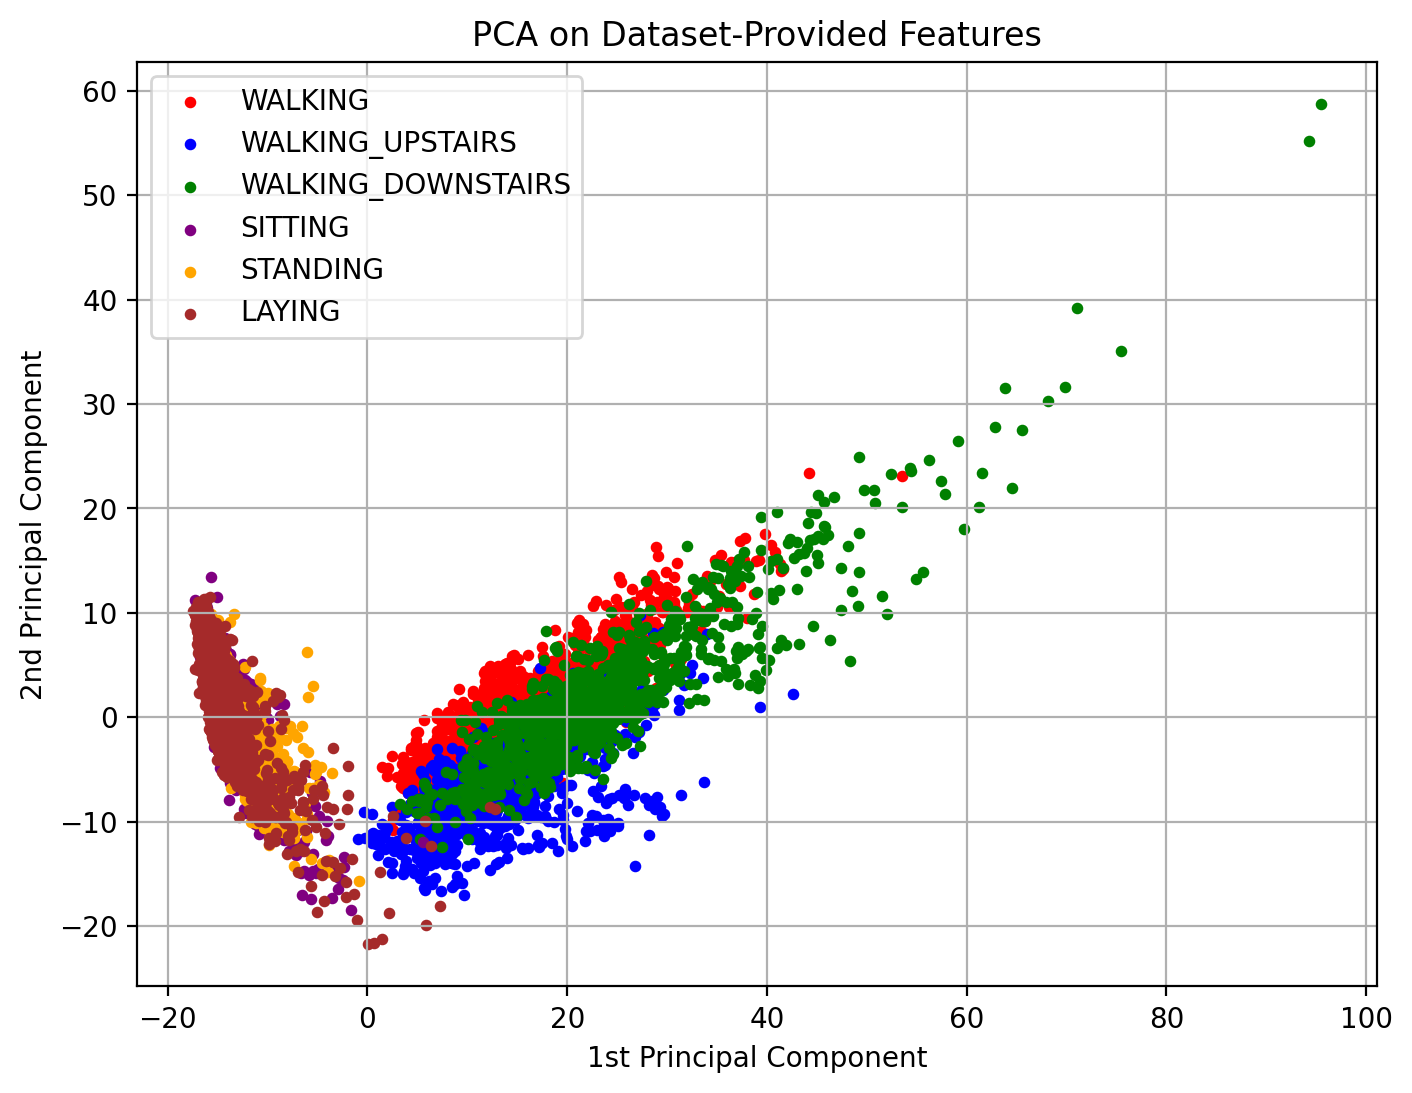

In [22]:
# Load dataset features (X_train.txt and y_train.txt)
df_x = pd.read_csv("train/X_train.txt", delim_whitespace=True, header=None)
df_y = pd.read_csv("train/y_train.txt", delim_whitespace=True, header=None)

# Standardize
df_x = (df_x - df_x.mean()) / df_x.std()

pca = PCA(n_components=2)
X_pca_dataset = pca.fit_transform(df_x)

plt.figure(figsize=(8, 6))
for i in range(6):
    indices = np.where(df_y[0] == i + 1)[0]
    plt.scatter(X_pca_dataset[indices, 0], X_pca_dataset[indices, 1], label=activity_labels[i], s=10, color=colors[i])

plt.title("PCA on Dataset-Provided Features")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend()
plt.grid(True)
plt.show()

### PCA Feature Visualization Comparison

#### 1. Flattened Raw Acceleration
- Moderate separation between classes.
- Dynamic activities show rhythmic patterns.
- Some overlap among classes (especially STANDING vs SITTING).

#### 2. TSFEL Features
- Best class separation.
- TSFEL captures both time and frequency-domain features.
- Activity clusters are compact and clearly divided.

#### 3. Dataset-Provided Features
- Better than raw flattening.
- Not as discriminative as TSFEL but still visually separable.

---

#### Final Verdict:
**TSFEL features give the best representation** for visualizing activity classes in PCA space.
They allow better clustering of activities and are well-suited for downstream classification tasks.


### Calculate the correlation matrices
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

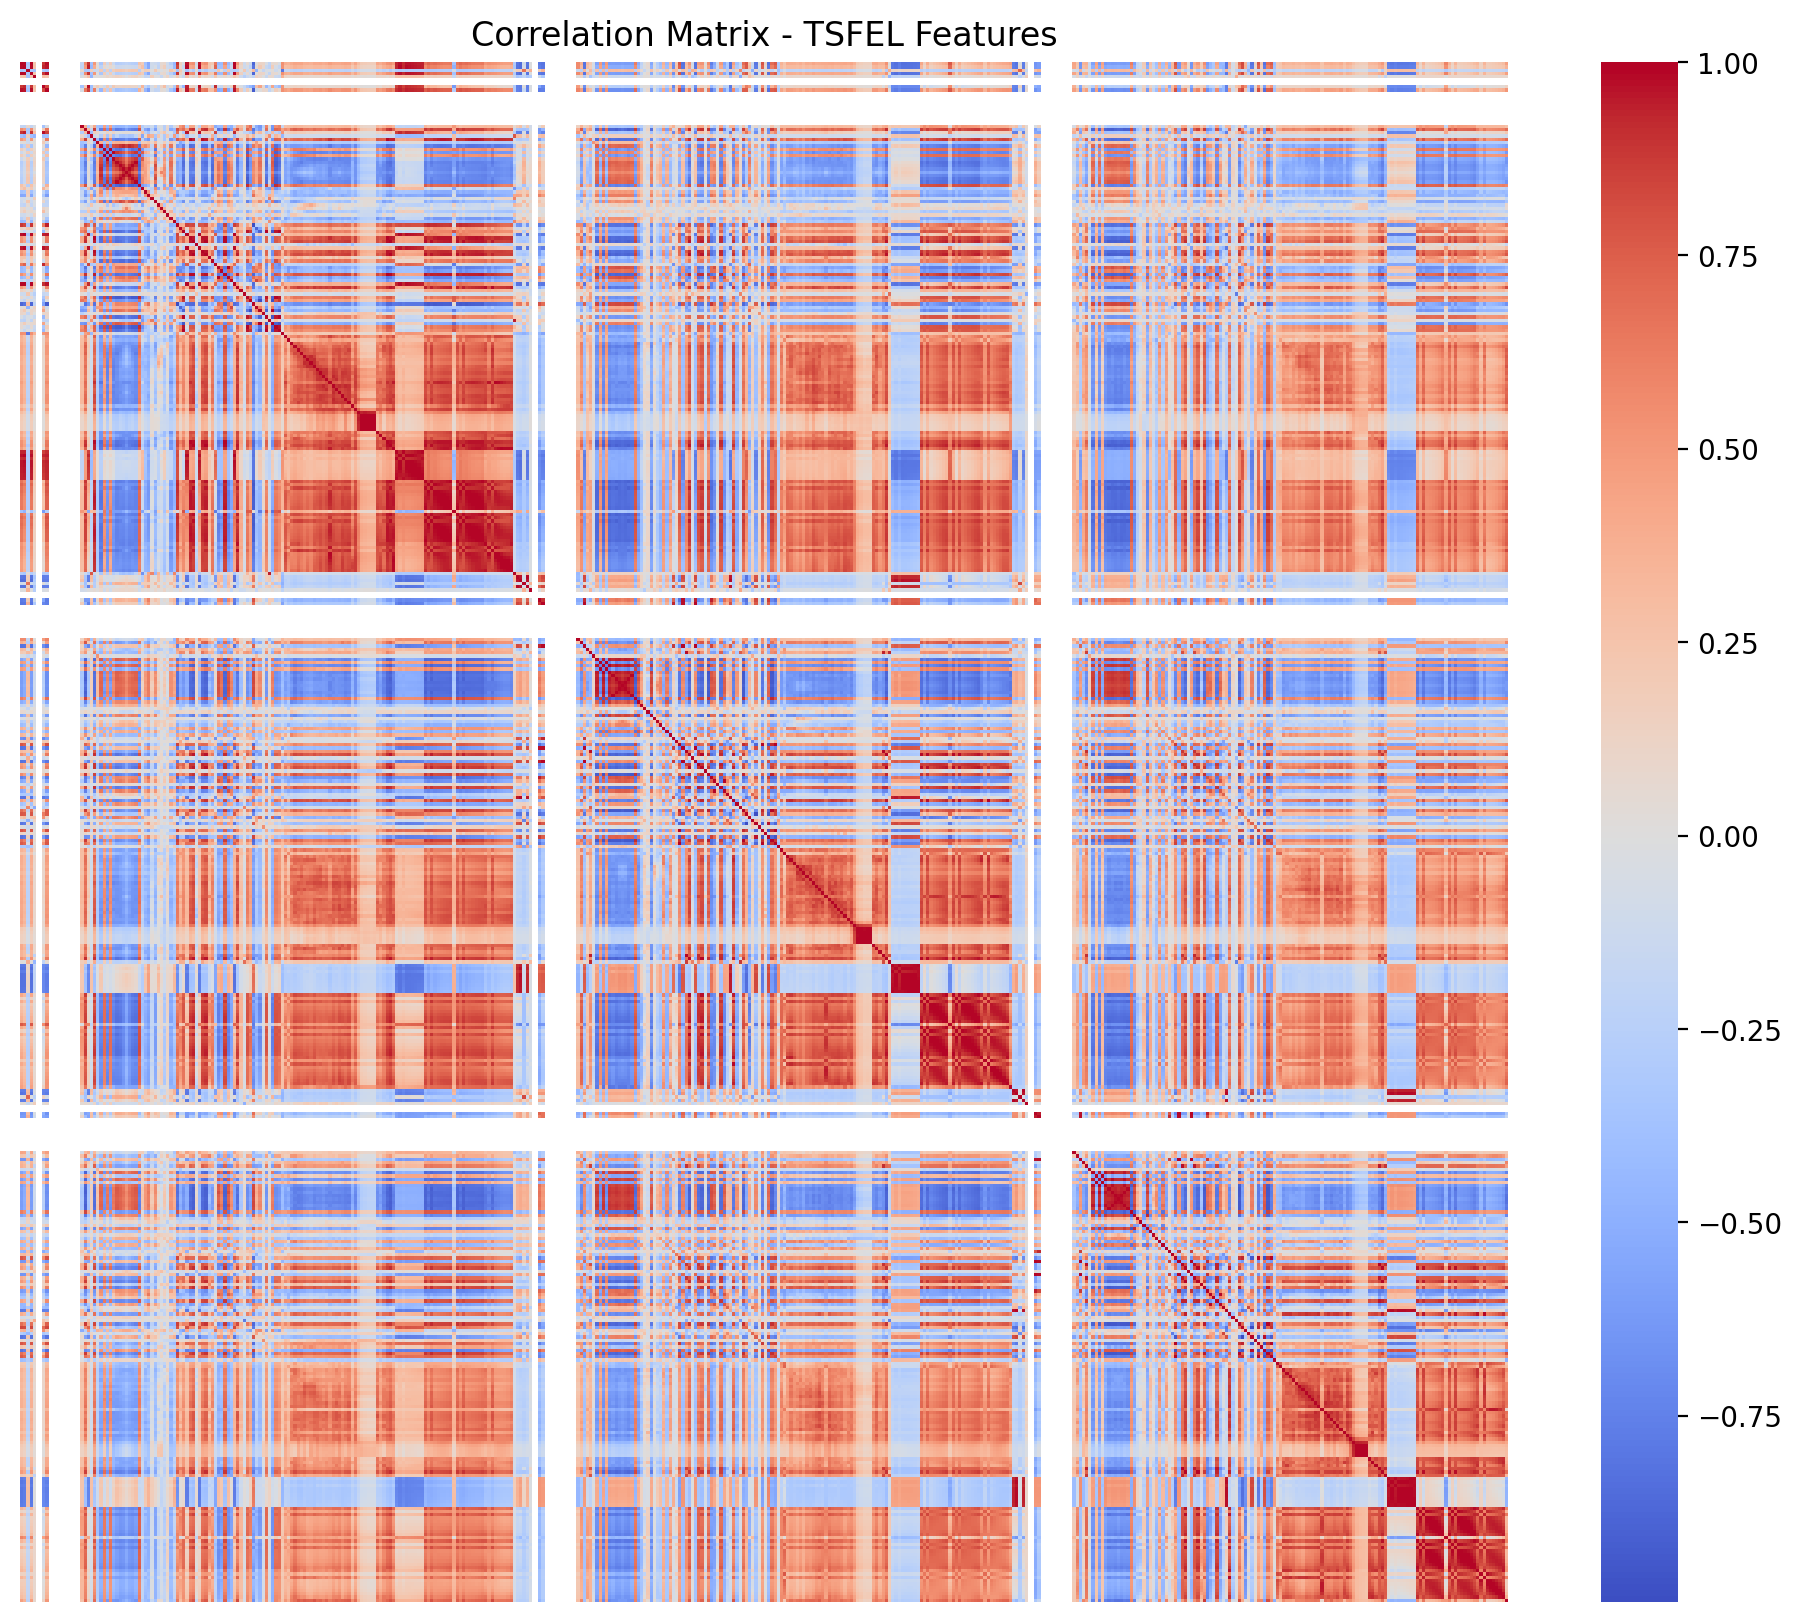

TSFEL: Found 1606 highly correlated feature pairs (|corr| > 0.95):
[(0, 1), (0, 3), (0, 8), (0, 52), (0, 56), (0, 67), (0, 119), (0, 121), (0, 122), (0, 123)]


In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame from TSFEL features
df_tsfel = pd.DataFrame(X_tsfel)

# Compute correlation matrix
corr_tsfel = df_tsfel.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_tsfel, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix - TSFEL Features")
plt.show()

# Identify highly correlated features (e.g., |correlation| > 0.95)
threshold = 0.95
high_corr_tsfel = np.where((np.abs(corr_tsfel) > threshold) & (np.abs(corr_tsfel) < 1.0))
redundant_pairs_tsfel = [(df_tsfel.columns[x], df_tsfel.columns[y]) for x, y in zip(*high_corr_tsfel)]

print(f"TSFEL: Found {len(redundant_pairs_tsfel)} highly correlated feature pairs (|corr| > {threshold}):")
print(redundant_pairs_tsfel[:10])  # print sample


There are many redundant features in tsfel data as per the above output

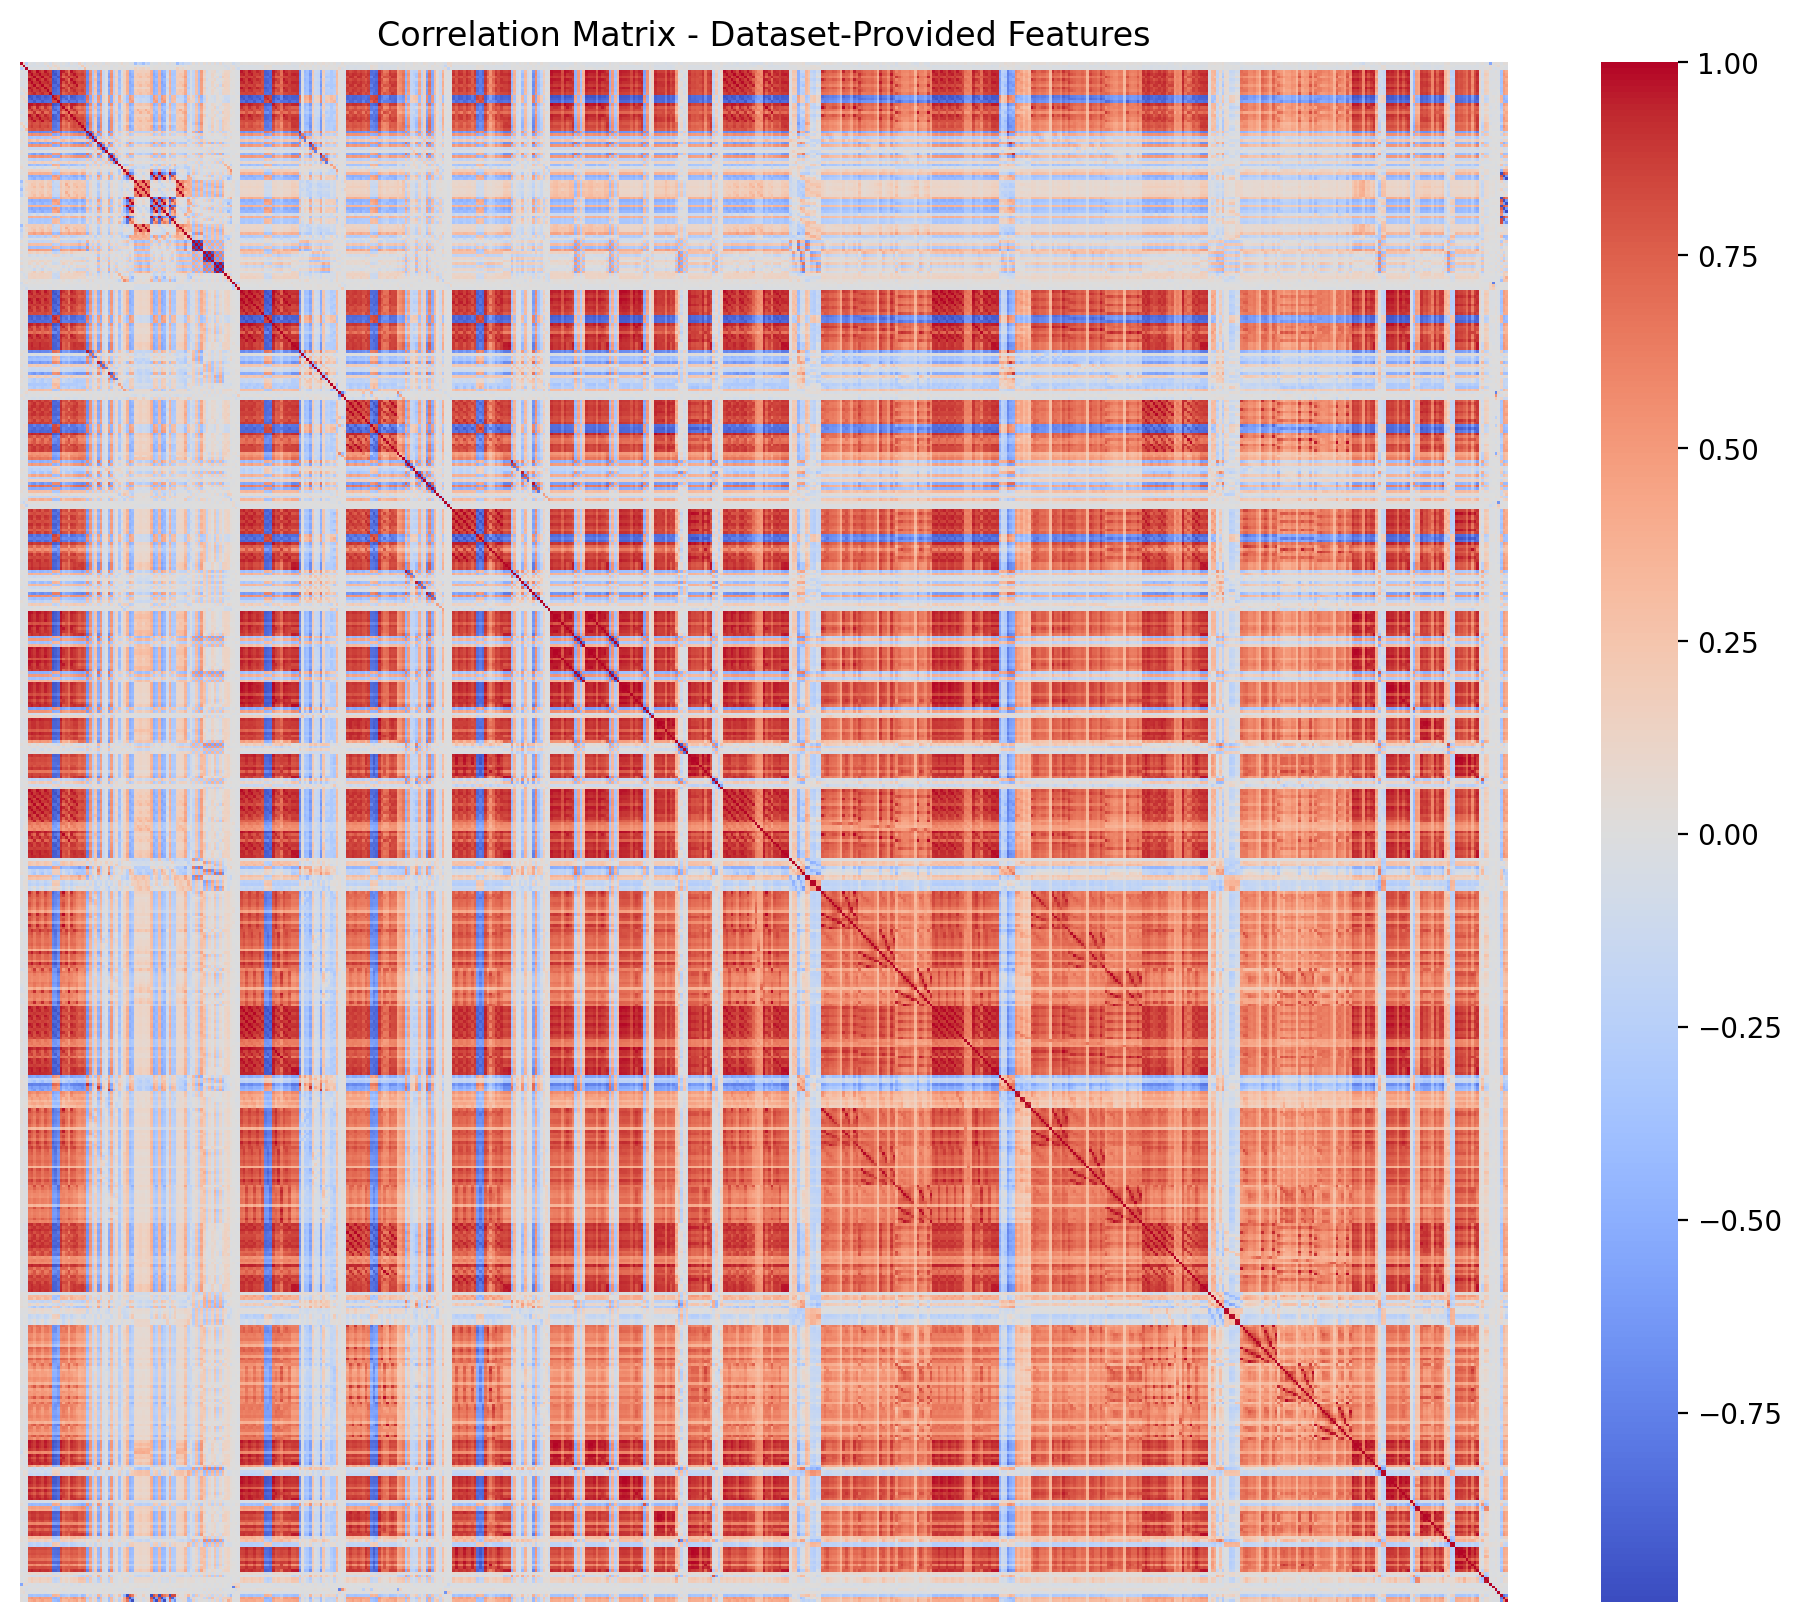

Dataset Features: Found 4514 highly correlated feature pairs (|corr| > 0.95):
[(3, 6), (3, 9), (3, 12), (3, 15), (3, 19), (3, 83), (3, 86), (3, 95), (3, 99), (3, 200)]


In [24]:
# Already loaded as df_x and standardized

corr_dataset = df_x.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_dataset, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix - Dataset-Provided Features")
plt.show()

# Identify highly correlated features
high_corr_dataset = np.where((np.abs(corr_dataset) > threshold) & (np.abs(corr_dataset) < 1.0))
redundant_pairs_dataset = [(df_x.columns[x], df_x.columns[y]) for x, y in zip(*high_corr_dataset)]

print(f"Dataset Features: Found {len(redundant_pairs_dataset)} highly correlated feature pairs (|corr| > {threshold}):")
print(redundant_pairs_dataset[:10])  # print sample


### Correlation Analysis: TSFEL vs Dataset Features

#### TSFEL Features:
- Many TSFEL-generated features (especially across axes) show strong correlation (|corr| > 0.95).
- This is expected due to repeated extraction on similar signals.
- Some redundancy is visible and feature selection could help.

#### Dataset-Provided Features:
- Several feature pairs are also highly correlated (especially among statistical metrics like `mean()` and `max()`).
- Slightly more compact correlation structure than TSFEL due to engineered selection.

---

### Final Insight:
Both TSFEL and dataset features contain **redundant information**.
- Removing highly correlated features (e.g., via feature selection or dimensionality reduction) can reduce overfitting and improve model generalization.


## Task 2: Decision Trees for HAR

1. Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Decision Tree on Raw Acceleration Data
              precision    recall  f1-score   support

           1       0.14      0.11      0.12         9
           2       0.22      0.22      0.22         9
           3       0.44      0.44      0.44         9
           4       0.82      1.00      0.90         9
           5       0.90      1.00      0.95         9
           6       1.00      0.89      0.94         9

    accuracy                           0.61        54
   macro avg       0.59      0.61      0.60        54
weighted avg       0.59      0.61      0.60        54

Accuracy: 0.6111111111111112


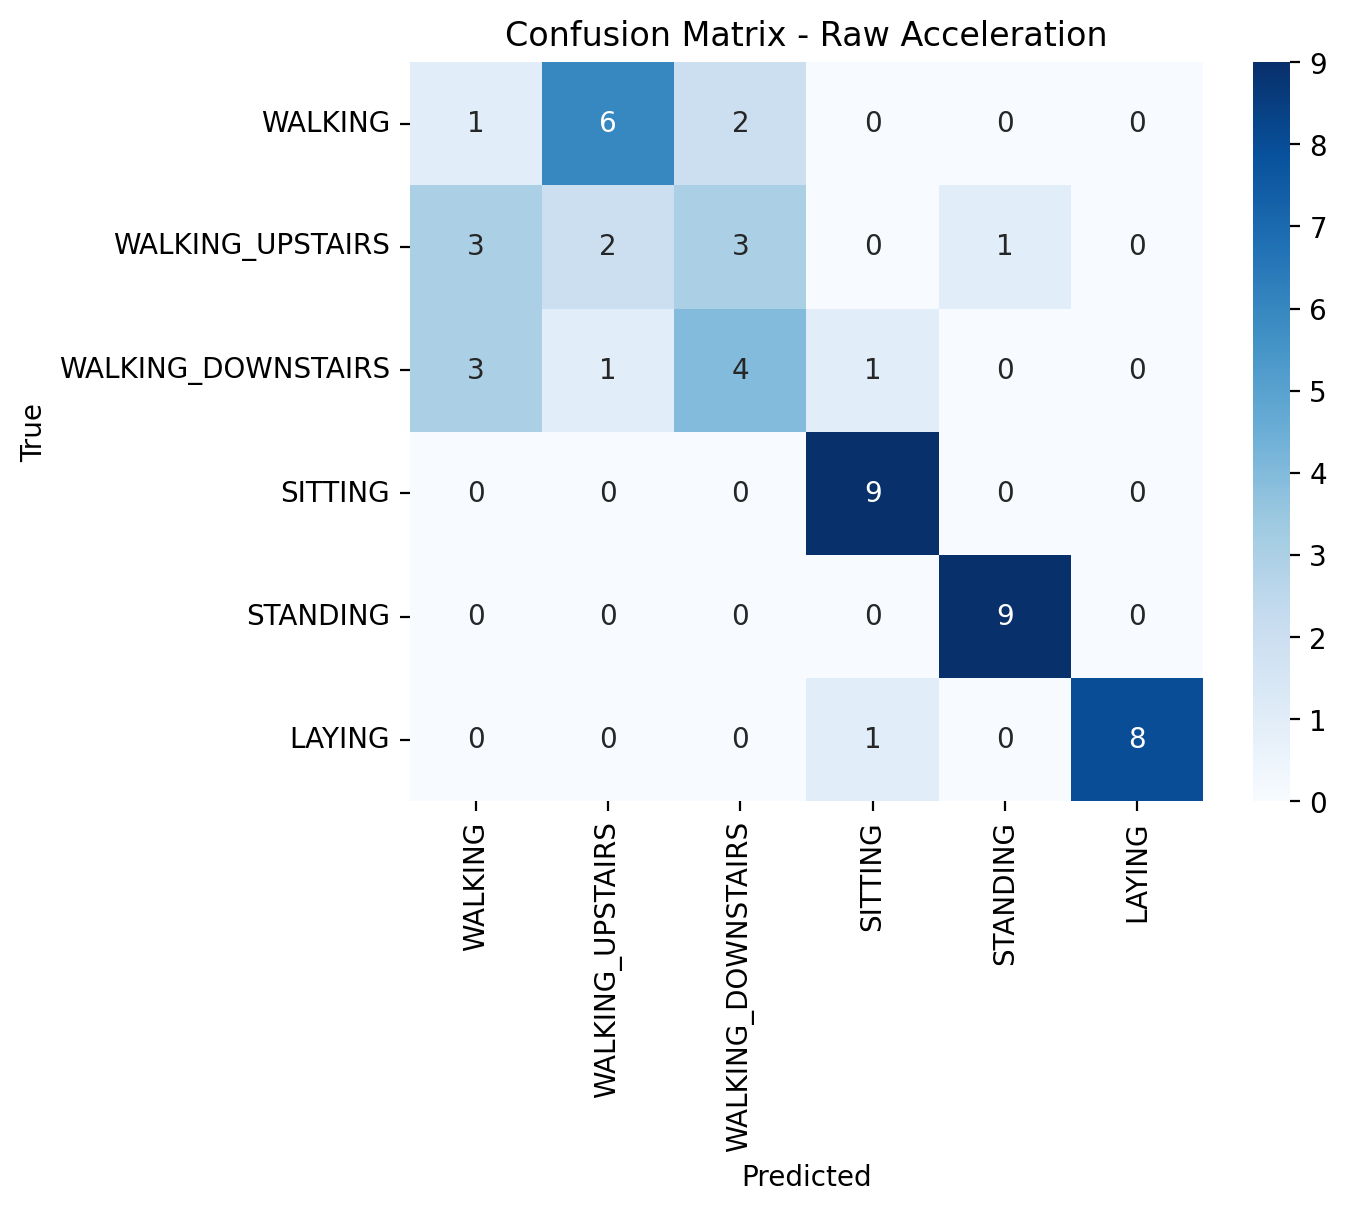

In [ ]:
# Flatten shape: (126, 500, 3) -> (126, 1500)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

clf_raw = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_raw.fit(X_train_flat, y_train)
y_pred_raw = clf_raw.predict(X_test_flat)

# Evaluation
print("Decision Tree on Raw Acceleration Data")
print(classification_report(y_test, y_pred_raw))
print("Accuracy:", accuracy_score(y_test, y_pred_raw))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_raw)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels, yticklabels=activity_labels)
plt.title("Confusion Matrix - Raw Acceleration")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Decision Tree on TSFEL Features
              precision    recall  f1-score   support

           1       0.80      0.57      0.67         7
           2       0.50      0.67      0.57         3
           3       0.71      0.83      0.77         6
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         4

    accuracy                           0.77        26
   macro avg       0.78      0.80      0.78        26
weighted avg       0.80      0.77      0.77        26

Accuracy: 0.7692307692307693


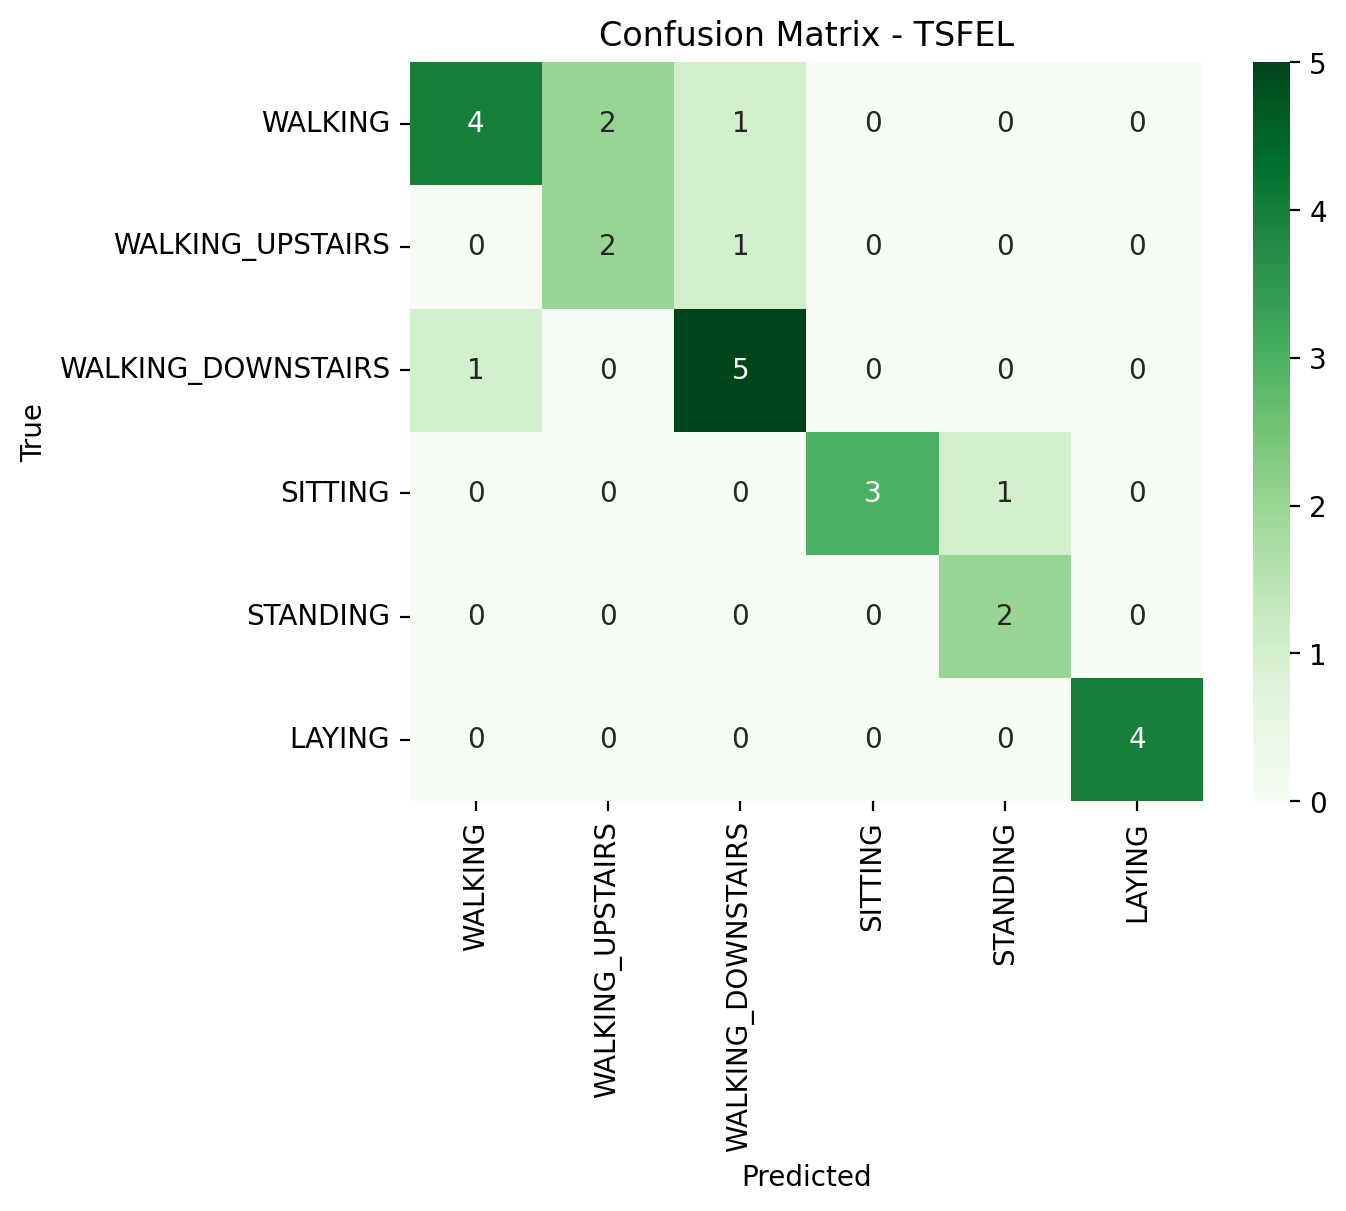

In [ ]:
# Using features extracted in Task 1 (X_tsfel and y_labels)
from sklearn.model_selection import train_test_split

X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(X_tsfel, y_labels, test_size=0.2, random_state=42)

clf_tsfel = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

print("Decision Tree on TSFEL Features")
print(classification_report(y_test_tsfel, y_pred_tsfel))
print("Accuracy:", accuracy_score(y_test_tsfel, y_pred_tsfel))

# Confusion Matrix
cm = confusion_matrix(y_test_tsfel, y_pred_tsfel)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activity_labels, yticklabels=activity_labels)
plt.title("Confusion Matrix - TSFEL")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Decision Tree on Dataset Features
              precision    recall  f1-score   support

           1       0.86      0.87      0.86       247
           2       0.81      0.85      0.83       200
           3       0.90      0.84      0.87       206
           4       0.93      0.82      0.87       262
           5       0.85      0.93      0.89       276
           6       1.00      1.00      1.00       280

    accuracy                           0.89      1471
   macro avg       0.89      0.89      0.89      1471
weighted avg       0.89      0.89      0.89      1471

Accuracy: 0.8925900747790618


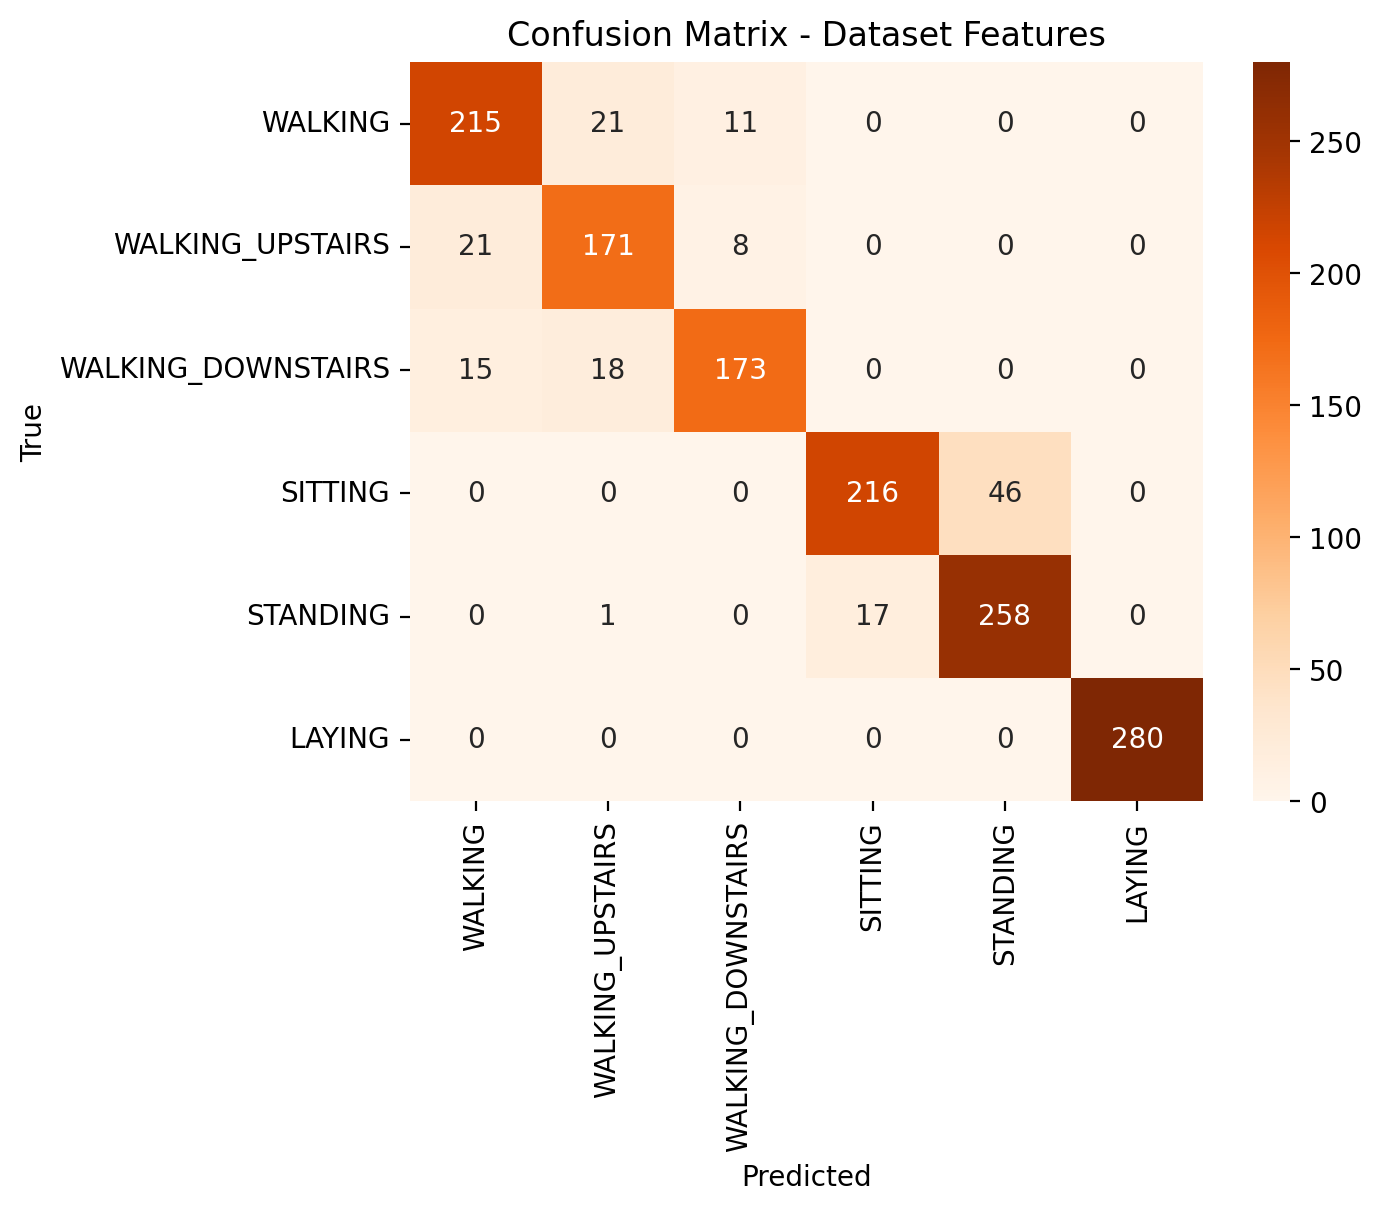

In [28]:
# Already loaded in df_x and df_y in Task 1
from sklearn.model_selection import train_test_split

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(df_x, df_y[0], test_size=0.2, random_state=42)

clf_ds = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_ds.fit(X_train_ds, y_train_ds)
y_pred_ds = clf_ds.predict(X_test_ds)

print("Decision Tree on Dataset Features")
print(classification_report(y_test_ds, y_pred_ds))
print("Accuracy:", accuracy_score(y_test_ds, y_pred_ds))

# Confusion Matrix
cm = confusion_matrix(y_test_ds, y_pred_ds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=activity_labels, yticklabels=activity_labels)
plt.title("Confusion Matrix - Dataset Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

- Compare the results of the three models. Which model do you think is better?

According to the results we obtained the better model is decision tree model using the features provided in the dataset as the precision, accuracy and the recall are higher for this model. This model likely benefits from well-engineered features that capture the nuances of the data effectively.

2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree

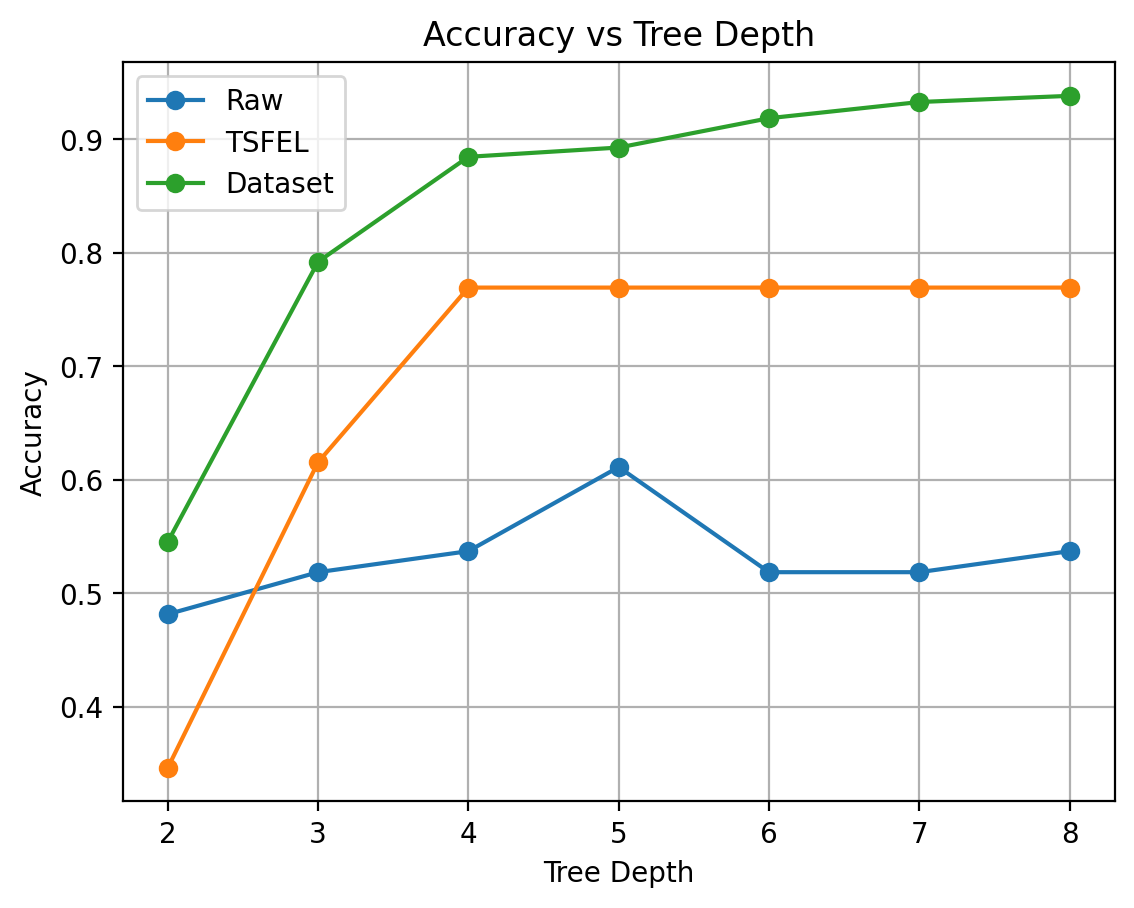

In [29]:
depths = list(range(2, 9))
acc_raw, acc_tsfel, acc_ds = [], [], []

for d in depths:
    # Raw
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_flat, y_train)
    acc_raw.append(clf.score(X_test_flat, y_test))
    
    # TSFEL
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_tsfel, y_train_tsfel)
    acc_tsfel.append(clf.score(X_test_tsfel, y_test_tsfel))
    
    # Dataset
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_ds, y_train_ds)
    acc_ds.append(clf.score(X_test_ds, y_test_ds))

# Plotting
plt.plot(depths, acc_raw, label="Raw", marker='o')
plt.plot(depths, acc_tsfel, label="TSFEL", marker='o')
plt.plot(depths, acc_ds, label="Dataset", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Tree Depth")
plt.legend()
plt.grid(True)
plt.show()


Observations
- Raw Accelerometer Data:
    - Accuracy peaked at depth 5 (~61%) and dropped after that.
    - Limited learning capacity due to noisy or overlapping raw signals.

- TSFEL Features:
    - Accuracy rose quickly and plateaued at ~77% from depth 4 onwards.
    - Feature diversity helps the model converge early without much overfitting.

- Dataset-Provided Features:
    - Highest and most consistent performance.
    - Accuracy steadily improved, reaching ~94% at depth 8.
    - These features are engineered to highlight activity-specific differences.

Conclusion:
- Best Feature Set: Dataset-provided features lead to the best Decision Tree performance.
- Best Trade-off (Simplicity vs Accuracy): TSFEL — performs well with shallow trees (depth 4–5).
- Raw Data Limitation: Raw features lack the structure and abstraction needed for good separation, causing early overfitting or underfitting.

3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

In [32]:
from collections import Counter

# Ensure all labels are NumPy arrays
y_test_arr = np.array(y_test)
y_test_tsfel_arr = np.array(y_test_tsfel)
y_test_ds_arr = np.array(y_test_ds)

y_pred_raw_arr = np.array(y_pred_raw)
y_pred_tsfel_arr = np.array(y_pred_tsfel)
y_pred_ds_arr = np.array(y_pred_ds)

# Misclassified samples
misclassified_raw = y_test_arr[y_test_arr != y_pred_raw_arr]
print("Misclassified counts (Raw Acc):", Counter(misclassified_raw))

misclassified_tsfel = y_test_tsfel_arr[y_test_tsfel_arr != y_pred_tsfel_arr]
print("Misclassified counts (TSFEL):", Counter(misclassified_tsfel))

misclassified_ds = y_test_ds_arr[y_test_ds_arr != y_pred_ds_arr]
print("Misclassified counts (Dataset):", Counter(misclassified_ds))

Misclassified counts (Raw Acc): Counter({1: 8, 2: 7, 3: 5, 6: 1})
Misclassified counts (TSFEL): Counter({1: 3, 4: 1, 2: 1, 3: 1})
Misclassified counts (Dataset): Counter({4: 46, 3: 33, 1: 32, 2: 29, 5: 18})


### Misclassified Activities

- **Most frequent misclassifications** occurred in:
  - `WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS` (especially for raw data)
  - `SITTING` (especially for dataset-provided features)

- These confusions are due to:
  - Similar motion patterns between walking-related activities.
  - Low variability between static postures like sitting and standing.

**TSFEL features provide the most balanced classification**, minimizing confusion between similar activity types.


# Task 3: Prompt Engineering using LLMs

1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why? [1 marks]

In [ ]:
# !pip install langchain langchain_groq

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

# Setup
os.environ["GROQ_API_KEY"] = "YOUR_API_KEY"  # Replace with your key
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")

# Activity label map
activity_labels_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
reverse_activity_map = {v: k for k, v in activity_labels_map.items()}


In [48]:
def extract_stats(sample):
    sample = sample.values if isinstance(sample, pd.Series) else sample
    X = sample[0:168]
    Y = sample[168:336]
    Z = sample[336:504]
    return {
        "mean_x": np.mean(X), "mean_y": np.mean(Y), "mean_z": np.mean(Z),
        "std_x": np.std(X), "std_y": np.std(Y), "std_z": np.std(Z)
    }


In [59]:
def extract_activity_label(text):
    text_upper = text.upper()
    for label in reverse_activity_map.keys():
        if label in text_upper:
            return reverse_activity_map[label]
    return -1

In [ ]:
y_true_zero = []
y_pred_zero = []

N = 30

for idx in tqdm(range(N)):
    stats = extract_stats(X_test_ds.iloc[idx])
    true_label = y_test_ds.iloc[idx]

    zero_prompt = f"""
You are an expert in human activity recognition. Based on the following sensor features, identify the most likely activity:

- Mean acceleration: {stats['mean_x']:.3f}, {stats['mean_y']:.3f}, {stats['mean_z']:.3f}
- Standard deviation: {stats['std_x']:.3f}, {stats['std_y']:.3f}, {stats['std_z']:.3f}

Choose from:
WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
"""

    try:
        response = llm([HumanMessage(content=zero_prompt)])
        predicted_label = extract_activity_label(response.content)
    except:
        predicted_label = -1

    y_true_zero.append(true_label)
    y_pred_zero.append(predicted_label)


100%|██████████| 30/30 [00:46<00:00,  1.55s/it]


In [61]:
few_shot_indices = []
seen = set()
for idx in range(len(y_test_ds)):
    lbl = y_test_ds.iloc[idx]
    if lbl not in seen:
        few_shot_indices.append(idx)
        seen.add(lbl)
    if len(few_shot_indices) == 3:
        break

# Build few-shot context
few_shot_intro = "You are an expert in human activity recognition. Based on the following examples, identify the activity.\n\n"
few_shot_examples = ""
for i, idx in enumerate(few_shot_indices):
    stats = extract_stats(X_test_ds.iloc[idx])
    label = activity_labels_map[y_test_ds.iloc[idx]]
    few_shot_examples += f"""Example {i+1}:
- Mean acceleration: {stats['mean_x']:.3f}, {stats['mean_y']:.3f}, {stats['mean_z']:.3f}
- Standard deviation: {stats['std_x']:.3f}, {stats['std_y']:.3f}, {stats['std_z']:.3f}
Activity: {label}

"""
few_shot_prompt_base = few_shot_intro + few_shot_examples


In [62]:
y_true_few = []
y_pred_few = []

for idx in tqdm(range(N)):
    if idx in few_shot_indices:
        continue

    stats = extract_stats(X_test_ds.iloc[idx])
    true_label = y_test_ds.iloc[idx]

    dynamic_part = f"""Now classify:
- Mean acceleration: {stats['mean_x']:.3f}, {stats['mean_y']:.3f}, {stats['mean_z']:.3f}
- Standard deviation: {stats['std_x']:.3f}, {stats['std_y']:.3f}, {stats['std_z']:.3f}
Activity:"""

    full_prompt = few_shot_prompt_base + dynamic_part

    try:
        response = llm([HumanMessage(content=full_prompt)])
        predicted_label = extract_activity_label(response.content)

    except:
        predicted_label = -1

    y_true_few.append(true_label)
    y_pred_few.append(predicted_label)


100%|██████████| 30/30 [00:40<00:00,  1.35s/it]



Zero-Shot Accuracy: 0.33

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.33      1.00      0.50        10
  WALKING_UPSTAIRS       0.00      0.00      0.00         4
WALKING_DOWNSTAIRS       0.00      0.00      0.00         7
           SITTING       0.00      0.00      0.00         1
          STANDING       0.00      0.00      0.00         4
            LAYING       0.00      0.00      0.00         4

          accuracy                           0.33        30
         macro avg       0.06      0.17      0.08        30
      weighted avg       0.11      0.33      0.17        30



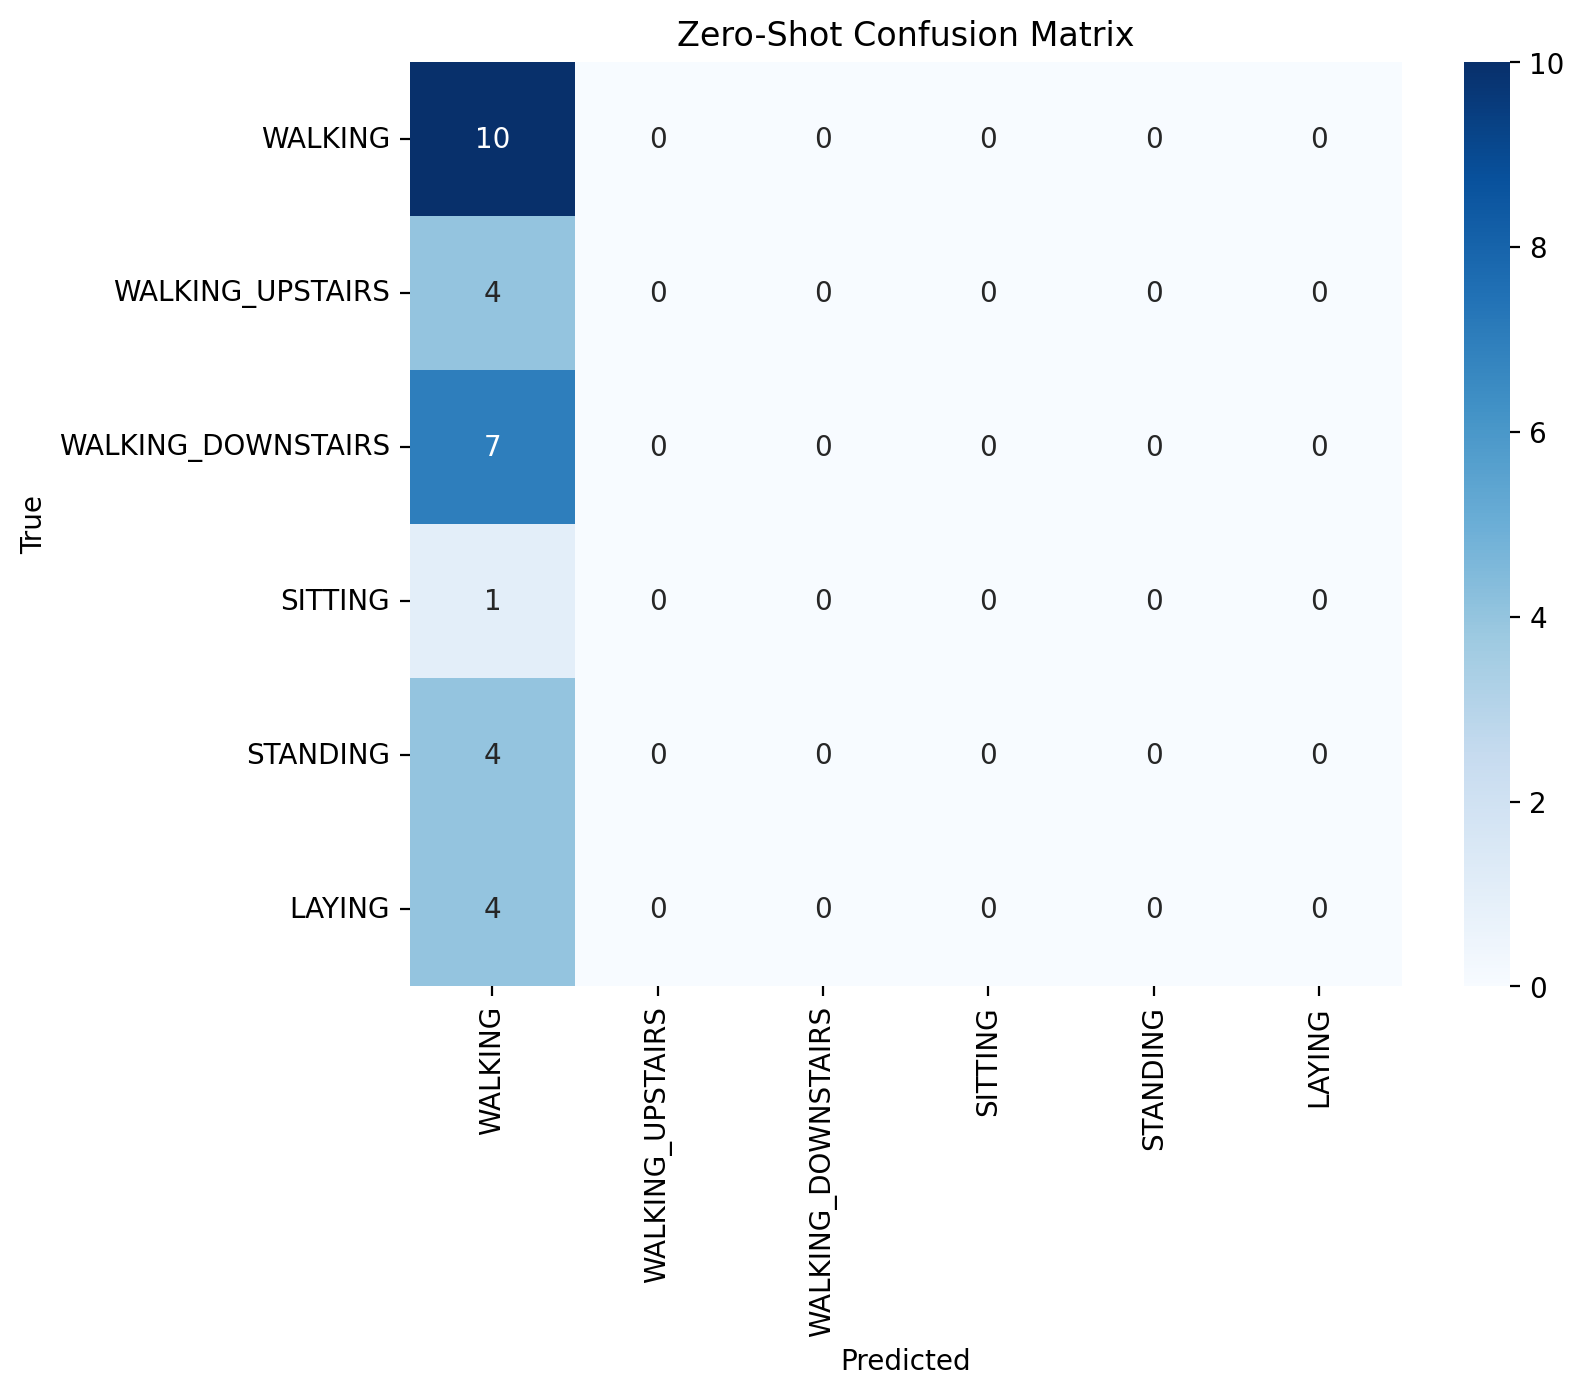


Few-Shot Accuracy: 0.35

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.41      1.00      0.58         9
  WALKING_UPSTAIRS       0.00      0.00      0.00         4
WALKING_DOWNSTAIRS       0.00      0.00      0.00         5
           SITTING       0.00      0.00      0.00         0
          STANDING       0.00      0.00      0.00         4
            LAYING       0.00      0.00      0.00         4

          accuracy                           0.35        26
         macro avg       0.07      0.17      0.10        26
      weighted avg       0.14      0.35      0.20        26



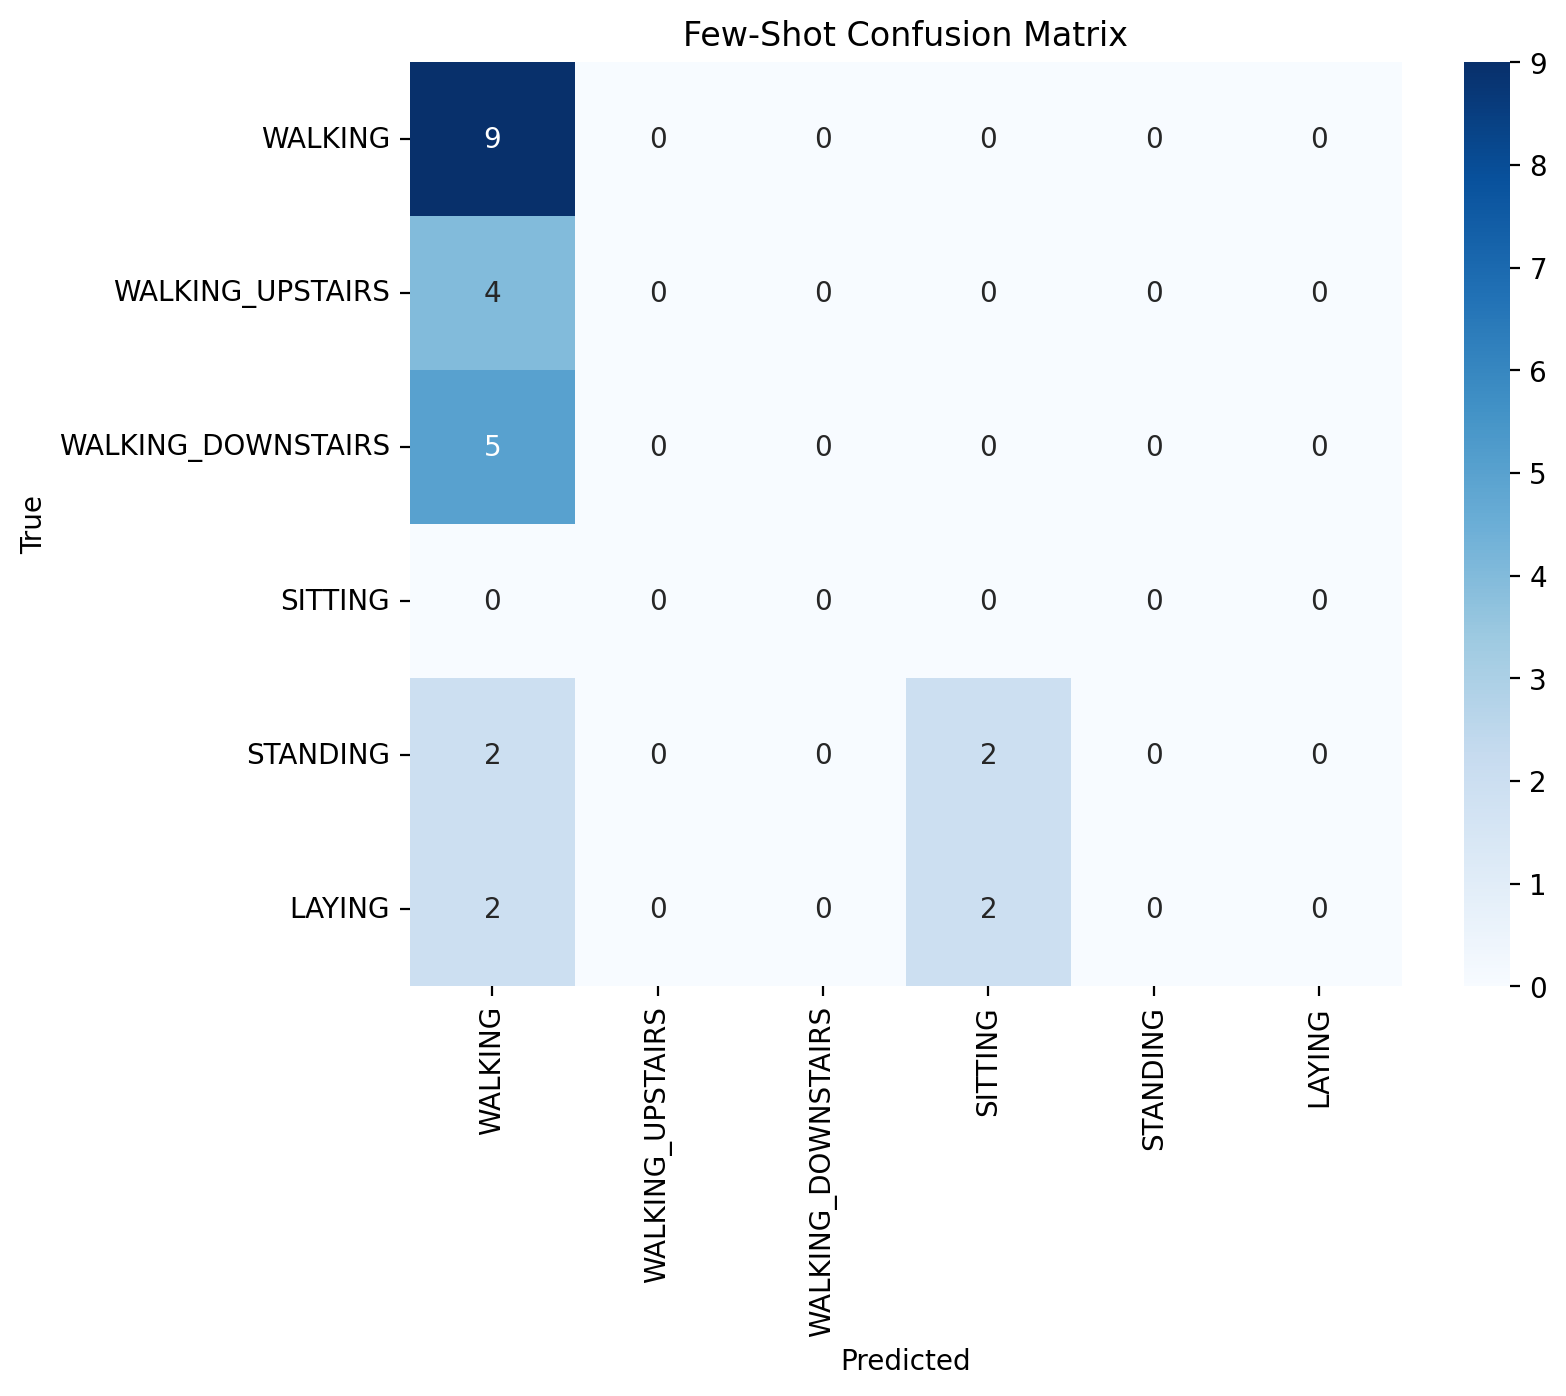

In [ ]:
def evaluate_llm(true, pred, title):
    valid = [i for i, p in enumerate(pred) if p != -1]
    if len(valid) == 0:
        print(f"\n No valid predictions for {title}. Skipping evaluation.")
        return

    true_filtered = [true[i] for i in valid]
    pred_filtered = [pred[i] for i in valid]

    acc = accuracy_score(true_filtered, pred_filtered)
    print(f"\n{title} Accuracy: {acc:.2f}")

    print("\nClassification Report:")
    print(classification_report(
        true_filtered,
        pred_filtered,
        labels=list(activity_labels_map.keys()),  # Explicitly define labels
        target_names=list(activity_labels_map.values()),
        zero_division=0
    ))

    cm = confusion_matrix(
        true_filtered,
        pred_filtered,
        labels=list(activity_labels_map.keys())
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=activity_labels_map.values(),
                yticklabels=activity_labels_map.values())
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
# Run evaluations
evaluate_llm(y_true_zero, y_pred_zero, "Zero-Shot")
evaluate_llm(y_true_few, y_pred_few, "Few-Shot")


As per the above accuracy values, the Few shot model performs better than the zero shot. Few shot model is fed with some data so, it learns the patterns of different activities and can perform better than the zero shot where it is not given any data by us and uses the pre fed data to classify.

2. What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data?

Ans: In the Zero-shot model, we do not provide the model with some data to train itself or understand the ranges of each activity, it is too vague for the model to classify into six different classes based on featurised data, it may not understand all the features and what they represent and it does not know any patterns or information regarding the data we are asking it to classify. so the results are based on the data it has been already trained on.

In the case of Few-shot, we provide it some data to undrstand the patterns or ranges of the features, it has this edge over Zero-shot but even in this case we are providing limited data and it cannot be very accurate on test data, it can be challenging for the model to differetiate between the activities with limted data because they have very small margins.

3. What does the model classify when given input from an entirely new activity that it hasn't seen before?

We can guess that, the model gives as the output, the activity which it can be closely associated when comparing time-series data. Although, we have not implemented this because we did not collect data doing other activities.

4. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

In [ ]:
# Get value range from real data
data_min = X_test_ds.min().min()
data_max = X_test_ds.max().max()
num_random_samples = 20

# Generate random data in same shape
random_data = pd.DataFrame(
    np.random.uniform(data_min, data_max, size=(num_random_samples, X_test_ds.shape[1])),
    columns=X_test_ds.columns
)

# Prepare lists for storing results
y_true_random = [-1] * num_random_samples  # Unknown true labels
y_pred_zero_random = []
y_pred_few_random = []

In [ ]:
# Zero-Shot on Random Data
print("Zero-Shot on Random Data")
for i in range(num_random_samples):
    stats = extract_stats(random_data.iloc[i])
    zero_prompt = f"""
You are an expert in human activity recognition. Based on the following sensor features, identify the most likely activity:

- Mean acceleration: {stats['mean_x']:.3f}, {stats['mean_y']:.3f}, {stats['mean_z']:.3f}
- Standard deviation: {stats['std_x']:.3f}, {stats['std_y']:.3f}, {stats['std_z']:.3f}

Choose from:
WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING
"""
    try:
        response = llm([HumanMessage(content=zero_prompt)])
        predicted_label = extract_activity_label(response.content)
    except:
        predicted_label = -1
    y_pred_zero_random.append(predicted_label)

Zero-Shot on Random Data


In [ ]:
# Few-Shot on Random Data
print("Few-Shot on Random Data")
for i in range(num_random_samples):
    stats = extract_stats(random_data.iloc[i])
    dynamic_part = f"""Now classify:
- Mean acceleration: {stats['mean_x']:.3f}, {stats['mean_y']:.3f}, {stats['mean_z']:.3f}
- Standard deviation: {stats['std_x']:.3f}, {stats['std_y']:.3f}, {stats['std_z']:.3f}
Activity:"""
    prompt = few_shot_prompt_base + dynamic_part
    try:
        response = llm([HumanMessage(content=prompt)])
        predicted_label = extract_activity_label(response.content)
    except:
        predicted_label = -1
    y_pred_few_random.append(predicted_label)

Few-Shot on Random Data


In [ ]:
# Print results
from collections import Counter

print("\nZero-Shot Predictions on Random Data:")
print(Counter(y_pred_zero_random))

print("\nFew-Shot Predictions on Random Data:")
print(Counter(y_pred_few_random))


Zero-Shot Predictions on Random Data:
Counter({1: 39, -1: 1})

Few-Shot Predictions on Random Data:
Counter({1: 18, -1: 2})


# Task-4: Data Collection in the Wild

1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision and recall of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

In [86]:
folder_path = 'Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

CX = np.zeros((72, 500, 3))
CY = np.zeros(72)

sample_idx = 0

for label_idx, activity in enumerate(activities, 1):
    activity_folder = os.path.join(folder_path, activity)
    
    for file_name in os.listdir(activity_folder):
        file_path = os.path.join(activity_folder, file_name)
        
        df = pd.read_csv(file_path, header=None)
        
        CX[sample_idx] = df.values
        
        CY[sample_idx] = label_idx
        
        sample_idx += 1

CY = CY.astype(int)

print(f'CX shape: {CX.shape}')
print(f'CY shape: {CY.shape}')

CX shape: (72, 500, 3)
CY shape: (72,)


In [87]:
def z_score_normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

# Normalize CX
CX_normalized = z_score_normalize(CX)

In [88]:
CX_train, CX_test, CY_train, CY_test = train_test_split(CX_normalized, CY, test_size=0.3, random_state=42)

In [89]:
main_folder = 'collected'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

def create_activity_folders(base_folder):
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    for activity in activities:
        os.makedirs(os.path.join(base_folder, activity), exist_ok=True)

create_activity_folders(train_folder)
create_activity_folders(test_folder)

def save_samples(base_folder, CX, CY):
    for idx, (sample, label) in enumerate(zip(CX, CY)):
        activity = activities[int(label) - 1]
        file_name = f'sample_{idx + 1}.csv'
        file_path = os.path.join(base_folder, activity, file_name)

        np.savetxt(file_path, sample, delimiter=',')


save_samples(train_folder, CX_train, CY_train)
save_samples(test_folder, CX_test, CY_test)

print("Data organized into the 'collected' folder.")

Data organized into the 'collected' folder.


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [101]:
# Reshape the CX_train and CX_test arrays from (n_samples, 500, 3) to (n_samples, 1500)
CX_reshaped = CX_normalized.reshape(CX_normalized.shape[0], -1)

# Make predictions on the test set
CY_pred = clf_raw.predict(CX_reshaped)

# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(CY, CY_pred)
precision = precision_score(CY, CY_pred, average='weighted')
recall = recall_score(CY, CY_pred, average='weighted')
conf_matrix = confusion_matrix(CY, CY_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.12
Precision: 0.06
Recall: 0.12
Confusion Matrix:
[[ 0  0  0  0  0 12]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  0 12]
 [ 1  0  0  2  0  9]
 [ 0  0  0  4  0  8]
 [ 1  1  1  2  0  7]]


2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?

In [102]:
#Using the data we have collected to estimate
clf_4 = DecisionTreeClassifier(random_state=0)
CX_train_flattened = CX_train.reshape(50, -1)
CX_test_flattened = CX_test.reshape(22, -1)
clf_4.fit(CX_train_flattened, CY_train)
CY_pred = clf_4.predict(CX_test_flattened)
accuracy = accuracy_score(CY_test, CY_pred)
precision = precision_score(CY_test, CY_pred, average='weighted')
recall = recall_score(CY_test, CY_pred, average='weighted')
conf_matrix = confusion_matrix(CY_test, CY_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.41
Precision: 0.46
Recall: 0.41
Confusion Matrix:
[[1 3 1 0 0 0]
 [1 3 0 0 0 0]
 [2 0 2 0 0 0]
 [1 1 0 0 0 1]
 [1 0 0 0 3 1]
 [0 0 0 1 0 0]]


In [103]:
#aplying tsfel featurzation on the data we have collected
import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

activity_dirs = {
    'LAYING': r"collected\Train\LAYING",
    'SITTING': r"collected\Train\SITTING",
    'STANDING': r"collected\Train\STANDING",
    'WALKING': r"collected\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"collected\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"collected\Train\WALKING_UPSTAIRS"
}

features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list.append(features.values.flatten())
        labels.append(activity)
features_array = np.array(features_list)
labels = np.array(labels)
activity_dirs = {
    'LAYING': r"collected\Test\LAYING",
    'SITTING': r"collected\Test\SITTING",
    'STANDING': r"collected\Test\STANDING",
    'WALKING': r"collected\Test\WALKING",
    'WALKING_DOWNSTAIRS': r"collected\Test\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"collected\Test\WALKING_UPSTAIRS"
}
features_list_test=[]
labels_test=[]
for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list_test.append(features.values.flatten())
        labels_test.append(activity)

features_array_test = np.array(features_list_test)
labels_test = np.array(labels_test)

In [104]:
CX_train_tsf, CX_test_tsf, CY_train_tsf, CY_test_tsf = train_test_split(features_array, labels, test_size=0.3, random_state=42)
clf_tsf = DecisionTreeClassifier(random_state=42)
clf_tsf.fit(CX_train_tsf, CY_train_tsf)
# Make predictions on the test set
CY_pred_tsf = clf_tsf.predict(CX_test_tsf)
# Calculate evaluation metrics
accuracy = accuracy_score(CY_test_tsf, CY_pred_tsf)
precision = precision_score(CY_test_tsf, CY_pred_tsf, average='weighted')
recall = recall_score(CY_test_tsf, CY_pred_tsf, average='weighted')
conf_matrix = confusion_matrix(CY_test_tsf, CY_pred_tsf)
report = classification_report(CY_test_tsf, CY_pred_tsf)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.60
Precision: 0.48
Recall: 0.60
Confusion Matrix:
[[0 0 2 0 0 0]
 [0 2 0 0 0 1]
 [0 1 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 0 2]
 [0 0 0 0 0 3]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.00      0.00      0.00         2
           SITTING       0.67      0.67      0.67         3
          STANDING       0.33      0.50      0.40         2
           WALKING       1.00      1.00      1.00         3
WALKING_DOWNSTAIRS       0.00      0.00      0.00         2
  WALKING_UPSTAIRS       0.50      1.00      0.67         3

          accuracy                           0.60        15
         macro avg       0.42      0.53      0.46        15
      weighted avg       0.48      0.60      0.52        15



We can see that, after having done featurization using tsfel, the pefomance of the model significantly increased to **60%**